In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import datetime
import logging
from logging import handlers
from fetch_data import (
    static_population_erva_age,
)
from forward_integration import forward_integration, get_model_parameters
from estimating_beta import construct_next_generation_matrix
mpl.rcParams['figure.dpi']= 175
plt.style.use('ggplot')

In [2]:
erva_pop_file = 'stats/erva_population_age_2020.csv'
number_age_groups = 9
num_ervas = 5
N_p = num_ervas
N_g = number_age_groups
mob_av, beta_gh, pop_erva_hat, age_er, = get_model_parameters(number_age_groups, num_ervas, erva_pop_file)
rho = construct_next_generation_matrix(beta_gh, pop_erva_hat, mob_av, age_er)

# number of optimization variables
N_f = (N_g-3)*N_p

In [3]:
# Plot parameters
plot_interval = 15
ervas_labels = ['HYKS', 'TYKS', 'TAYS', 'KYS', 'OYS']
# age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

# Simulation parameters
t0 = '2021-04-19'
T = 115

# Transmission parameter
R = 1.2
beta = R/rho
print(beta)

# Number of vaccines per day
u = 30000

0.024529767182575667


In [4]:
policy = 'equal'

_, _, _, _, _, D_g, u_g = forward_integration(u, mob_av, beta, beta_gh, T, pop_erva_hat, age_er, t0, policy)

age_er_prop = age_er.T
age_er_prop = age_er_prop[:, :, np.newaxis]
D_g_plot = D_g*age_er_prop
u_g_plot = u_g*age_er_prop

In [5]:
def plot_ervas(ax, D_g, t0, T, ervas_labels, plot_subject):
    begin = datetime.datetime.strptime(t0, '%Y-%m-%d')
    
    num_ages, num_ervas, days = D_g.shape
    assert num_ervas == len(ervas_labels)
    
    x = [begin + datetime.timedelta(days=day) for day in range(T)]
    deaths = D_g.sum(axis=0)
    assert deaths.shape[0] == num_ervas
    assert deaths.shape[1] == T
    
    for erva_i in range(num_ervas):
        ax.plot(x, deaths[erva_i, :], label=ervas_labels[erva_i])
        
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of %s' % (plot_subject, ))
    ax.set_title('Number of %s per ERVA' % (plot_subject, ))
        
    ax.legend()

In [6]:
def plot_age_groups(ax, D_g, t0, T, age_labels, plot_subject):
    begin = datetime.datetime.strptime(t0, '%Y-%m-%d')
    
    num_ages, num_ervas, days = D_g.shape
    assert num_ages == len(age_labels)
    
    x = [begin + datetime.timedelta(days=day) for day in range(T)]
    deaths = D_g.sum(axis=1)
    assert deaths.shape[0] == num_ages
    assert deaths.shape[1] == T
    
    for age_i in range(num_ages):
        ax.plot(x, deaths[age_i, :], label=age_labels[age_i])
        
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of %s' % (plot_subject, ))
    ax.set_title('Number of %s per age group' % (plot_subject, ))
        
    ax.legend()

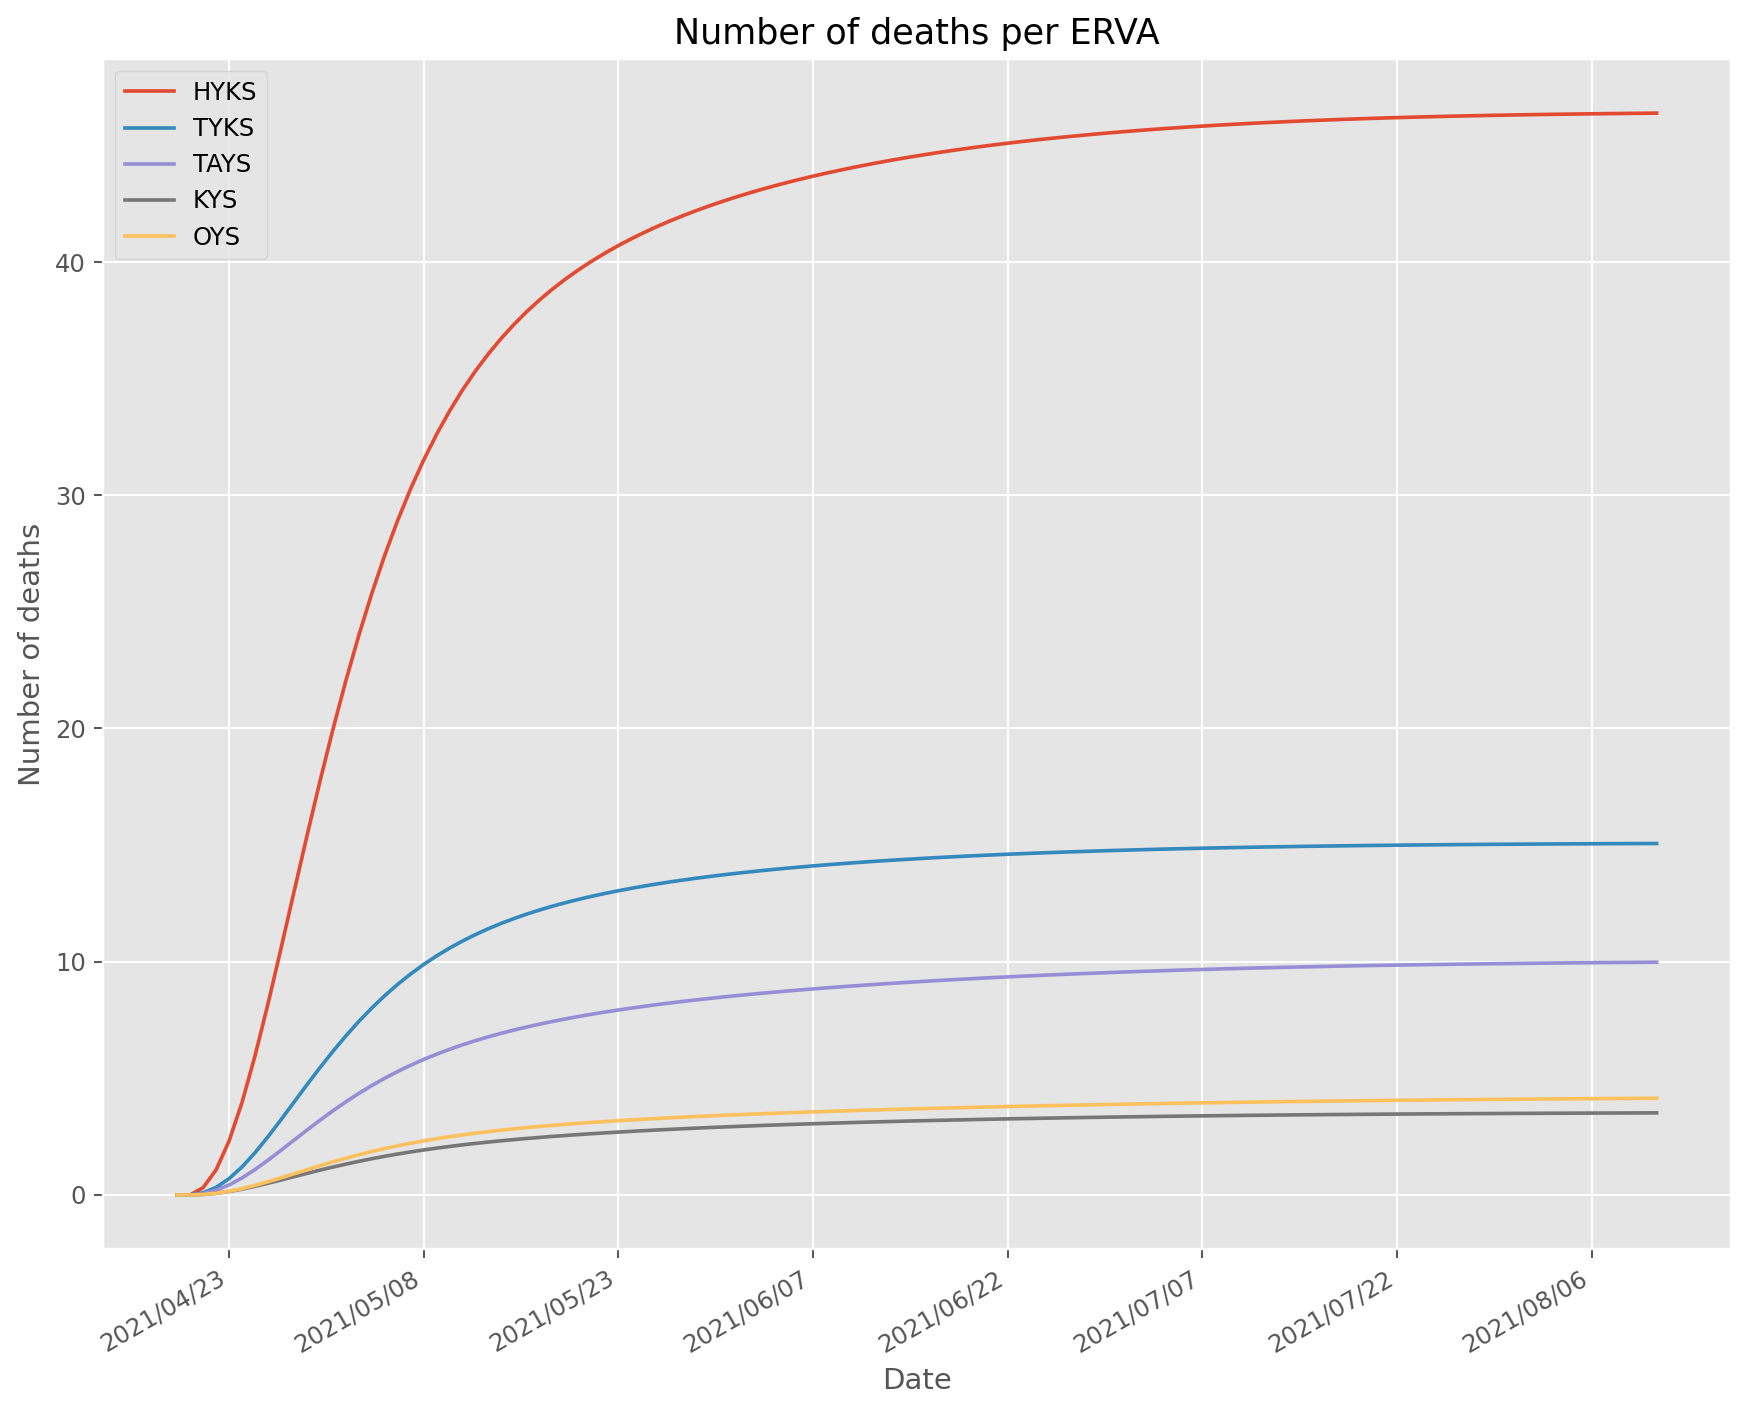

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_ervas(ax=ax, D_g=D_g_plot, t0=t0, T=T, ervas_labels=ervas_labels, plot_subject='deaths')

fig.autofmt_xdate()

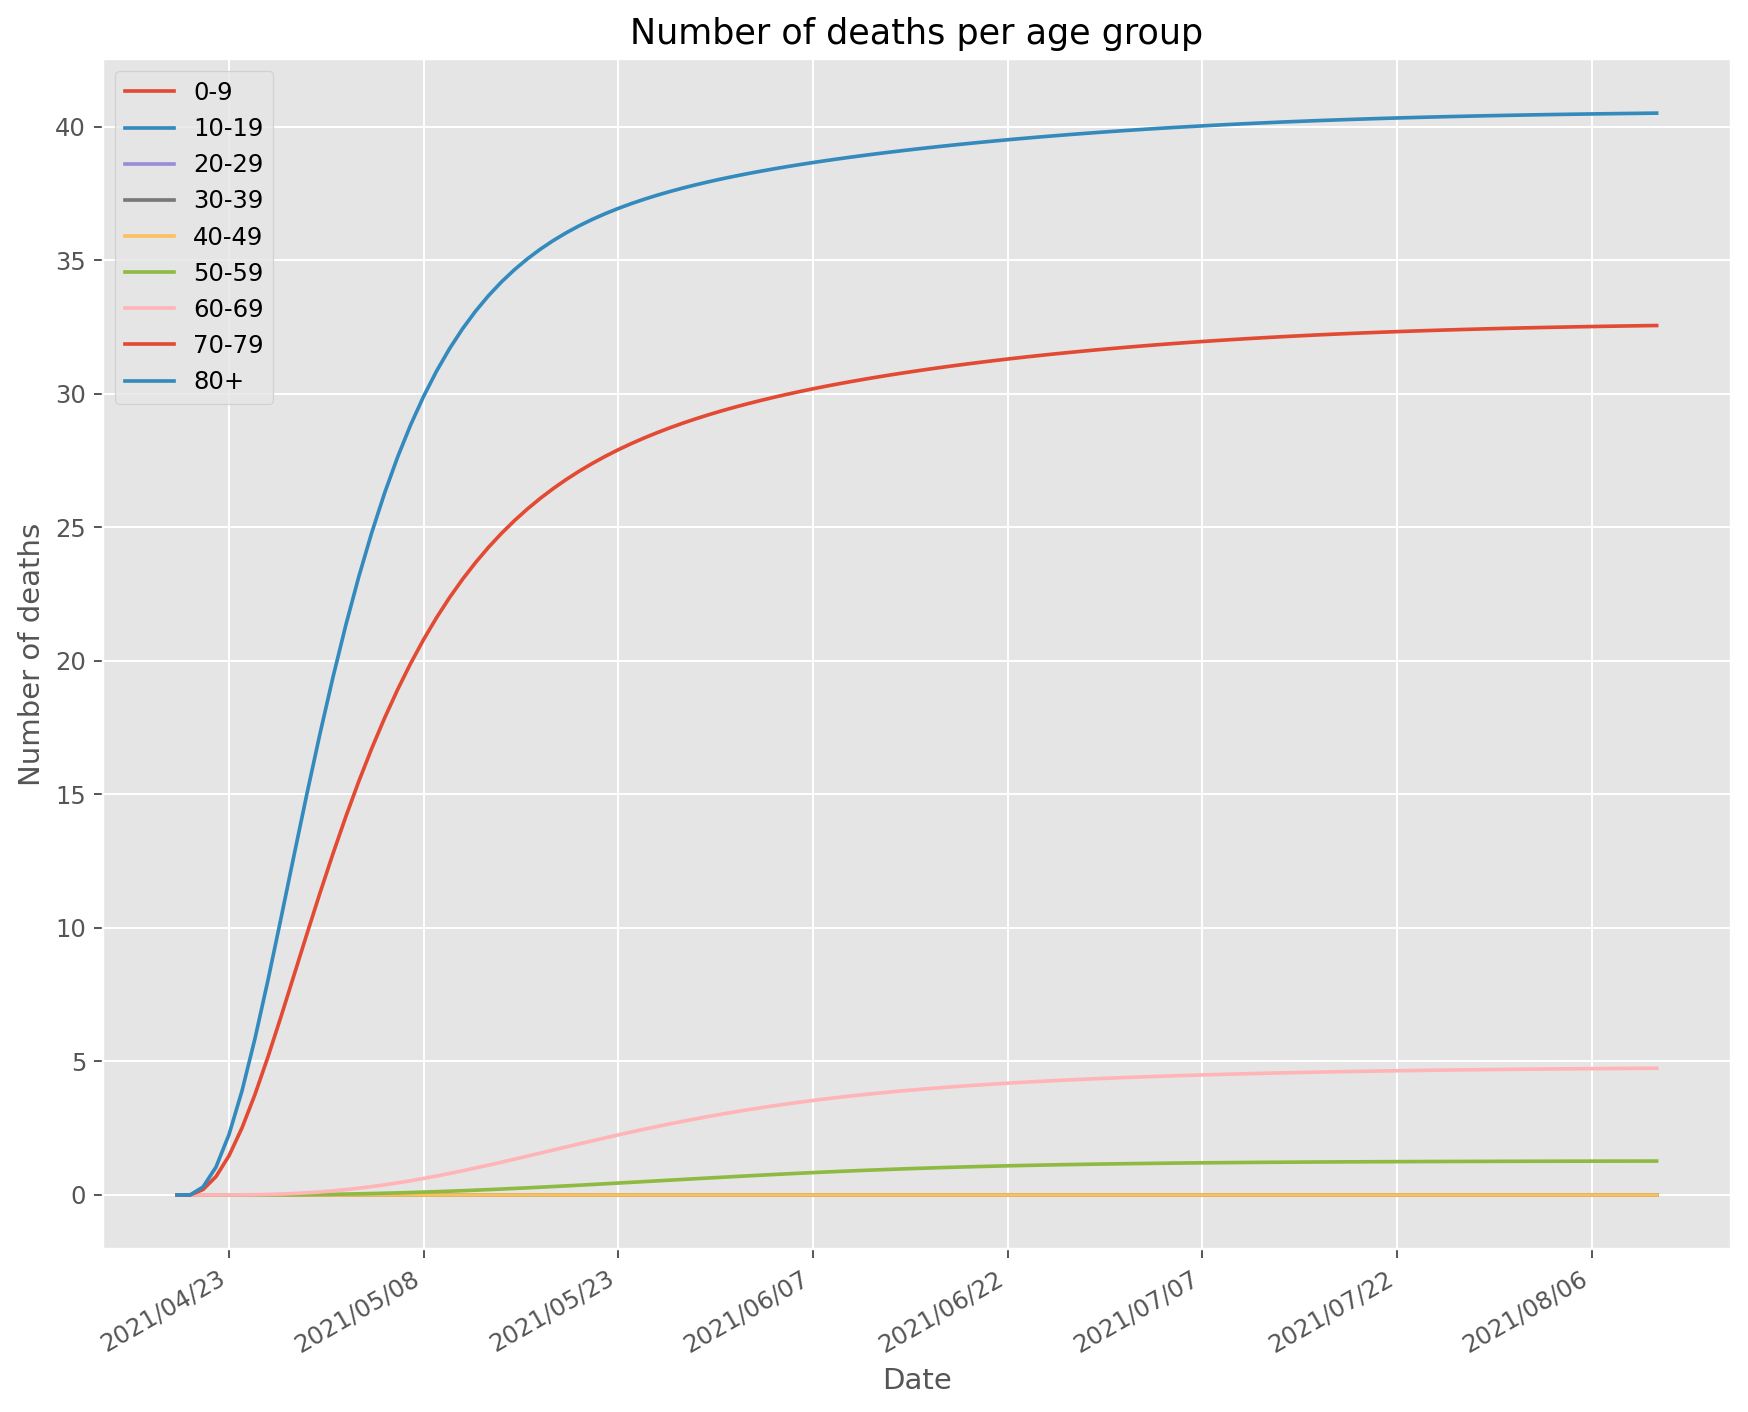

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_age_groups(ax=ax, D_g=D_g_plot, t0=t0, T=T, age_labels=age_labels, plot_subject='deaths')

fig.autofmt_xdate()

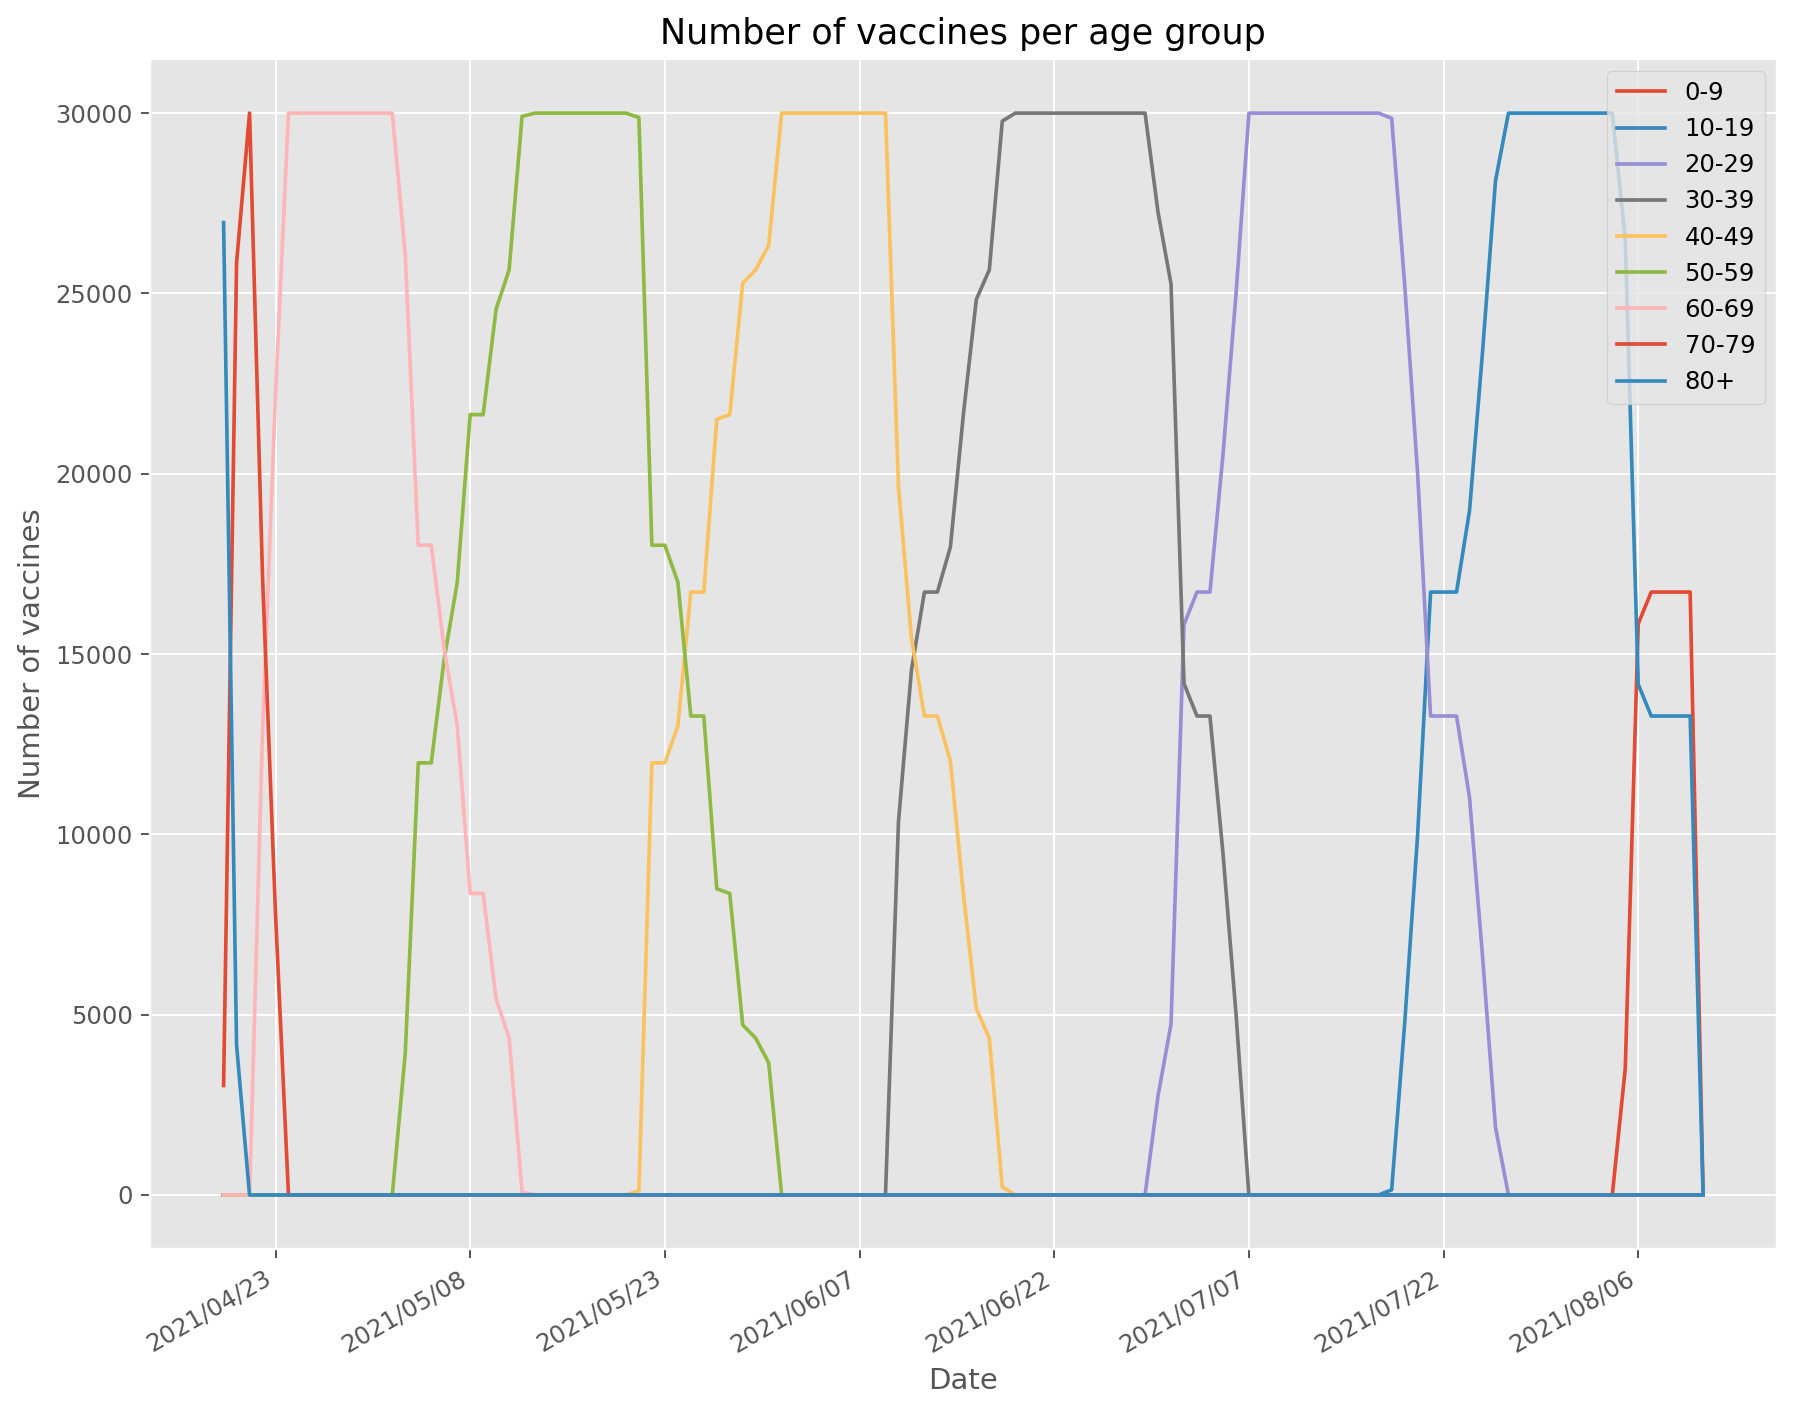

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_age_groups(ax=ax, D_g=u_g_plot, t0=t0, T=T, age_labels=age_labels, plot_subject='vaccines')

fig.autofmt_xdate()

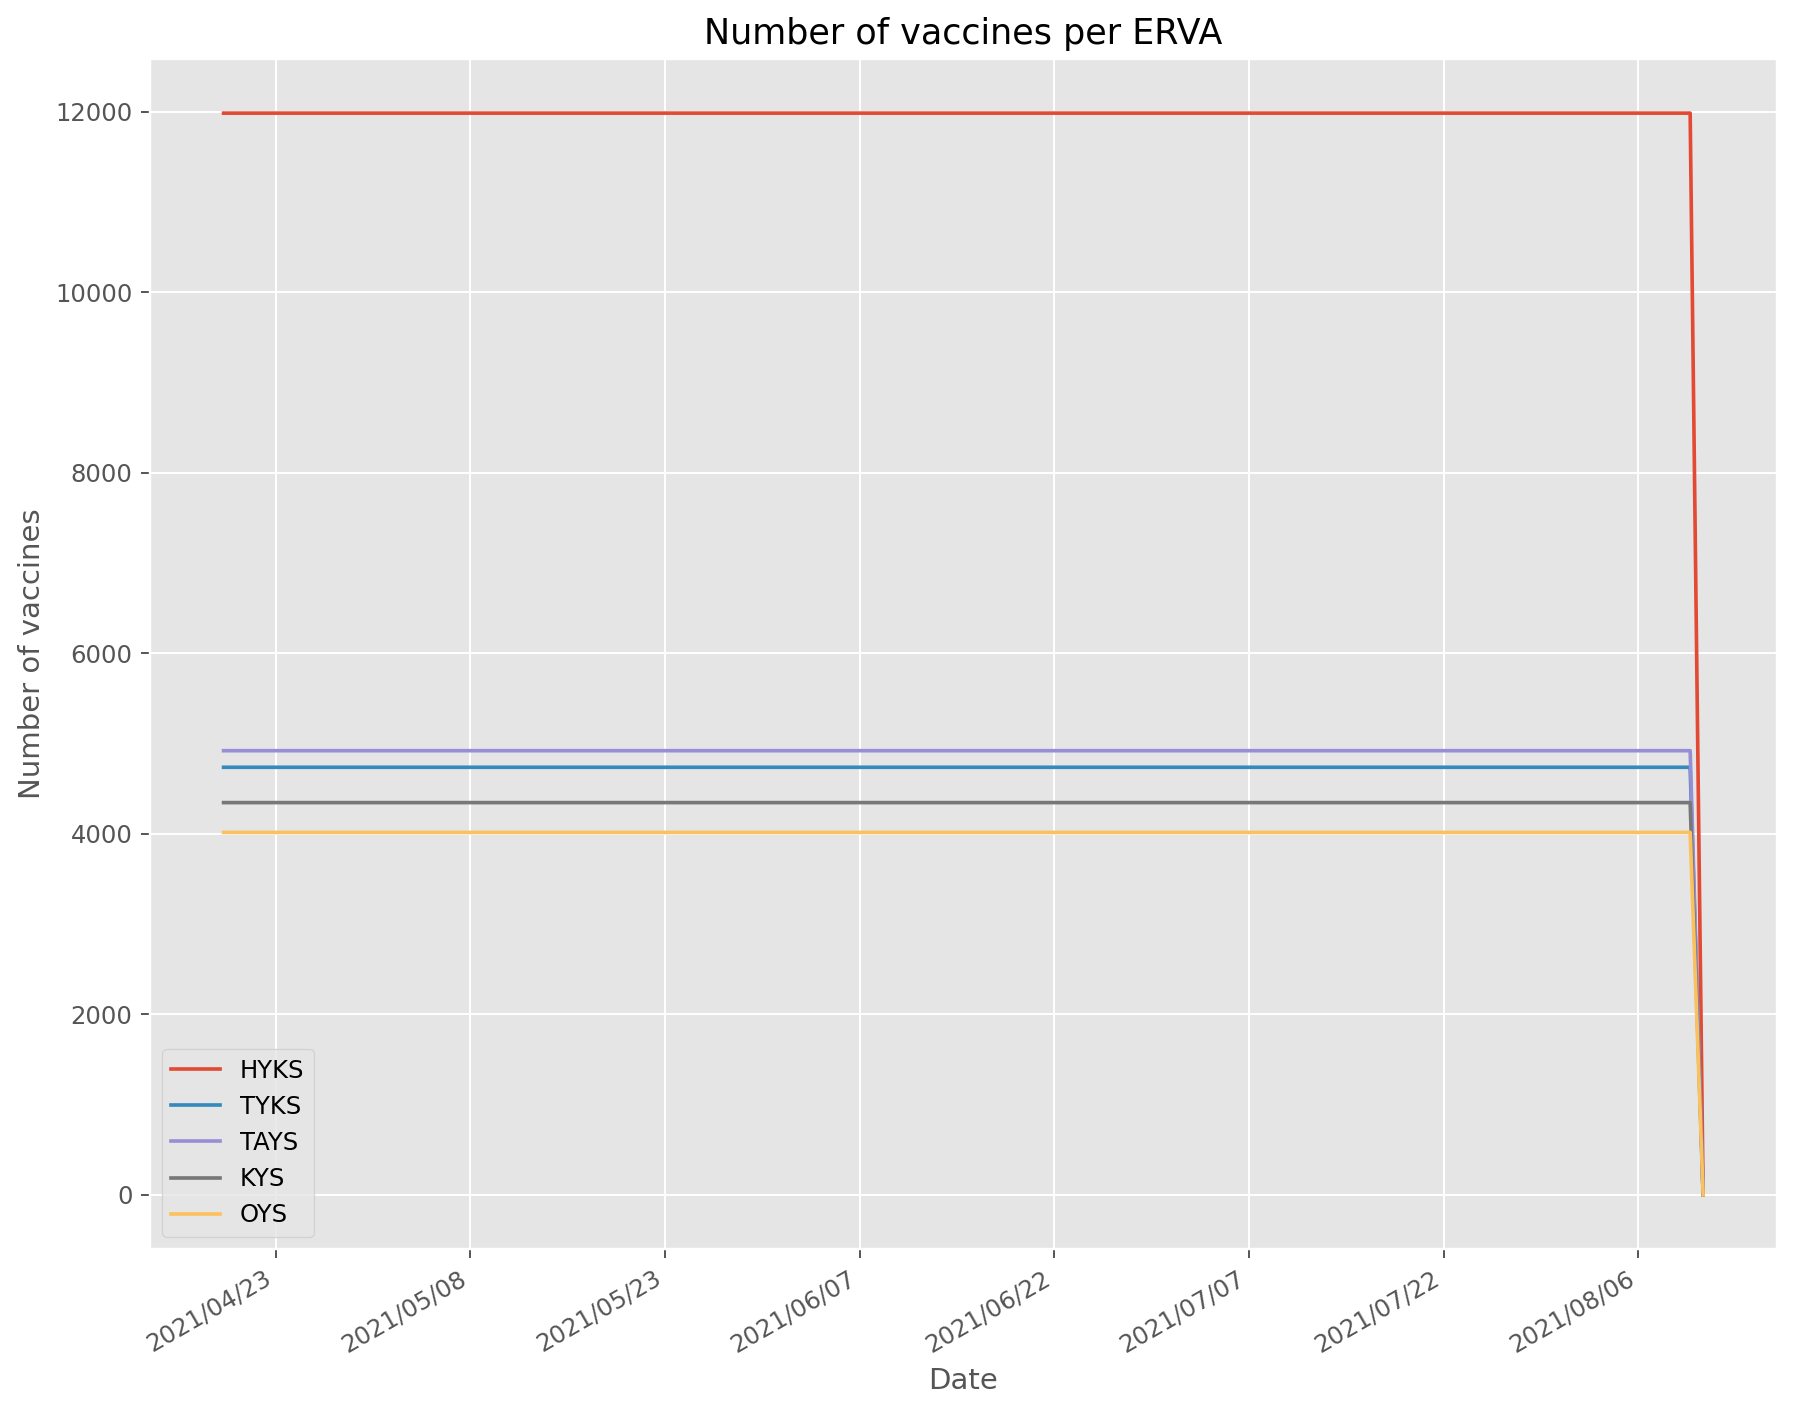

In [10]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_ervas(ax=ax, D_g=u_g_plot, t0=t0, T=T, ervas_labels=ervas_labels, plot_subject='vaccines')

fig.autofmt_xdate()

In [11]:
policy = 'thl'

_, _, _, _, _, D_g_thl, u_g_thl = forward_integration(u, mob_av, beta, beta_gh, T, pop_erva_hat, age_er, t0, policy)

age_er_prop = age_er.T
age_er_prop = age_er_prop[:, :, np.newaxis]
D_g_thl_plot = D_g_thl*age_er_prop
u_g_thl_plot = u_g_thl*age_er_prop

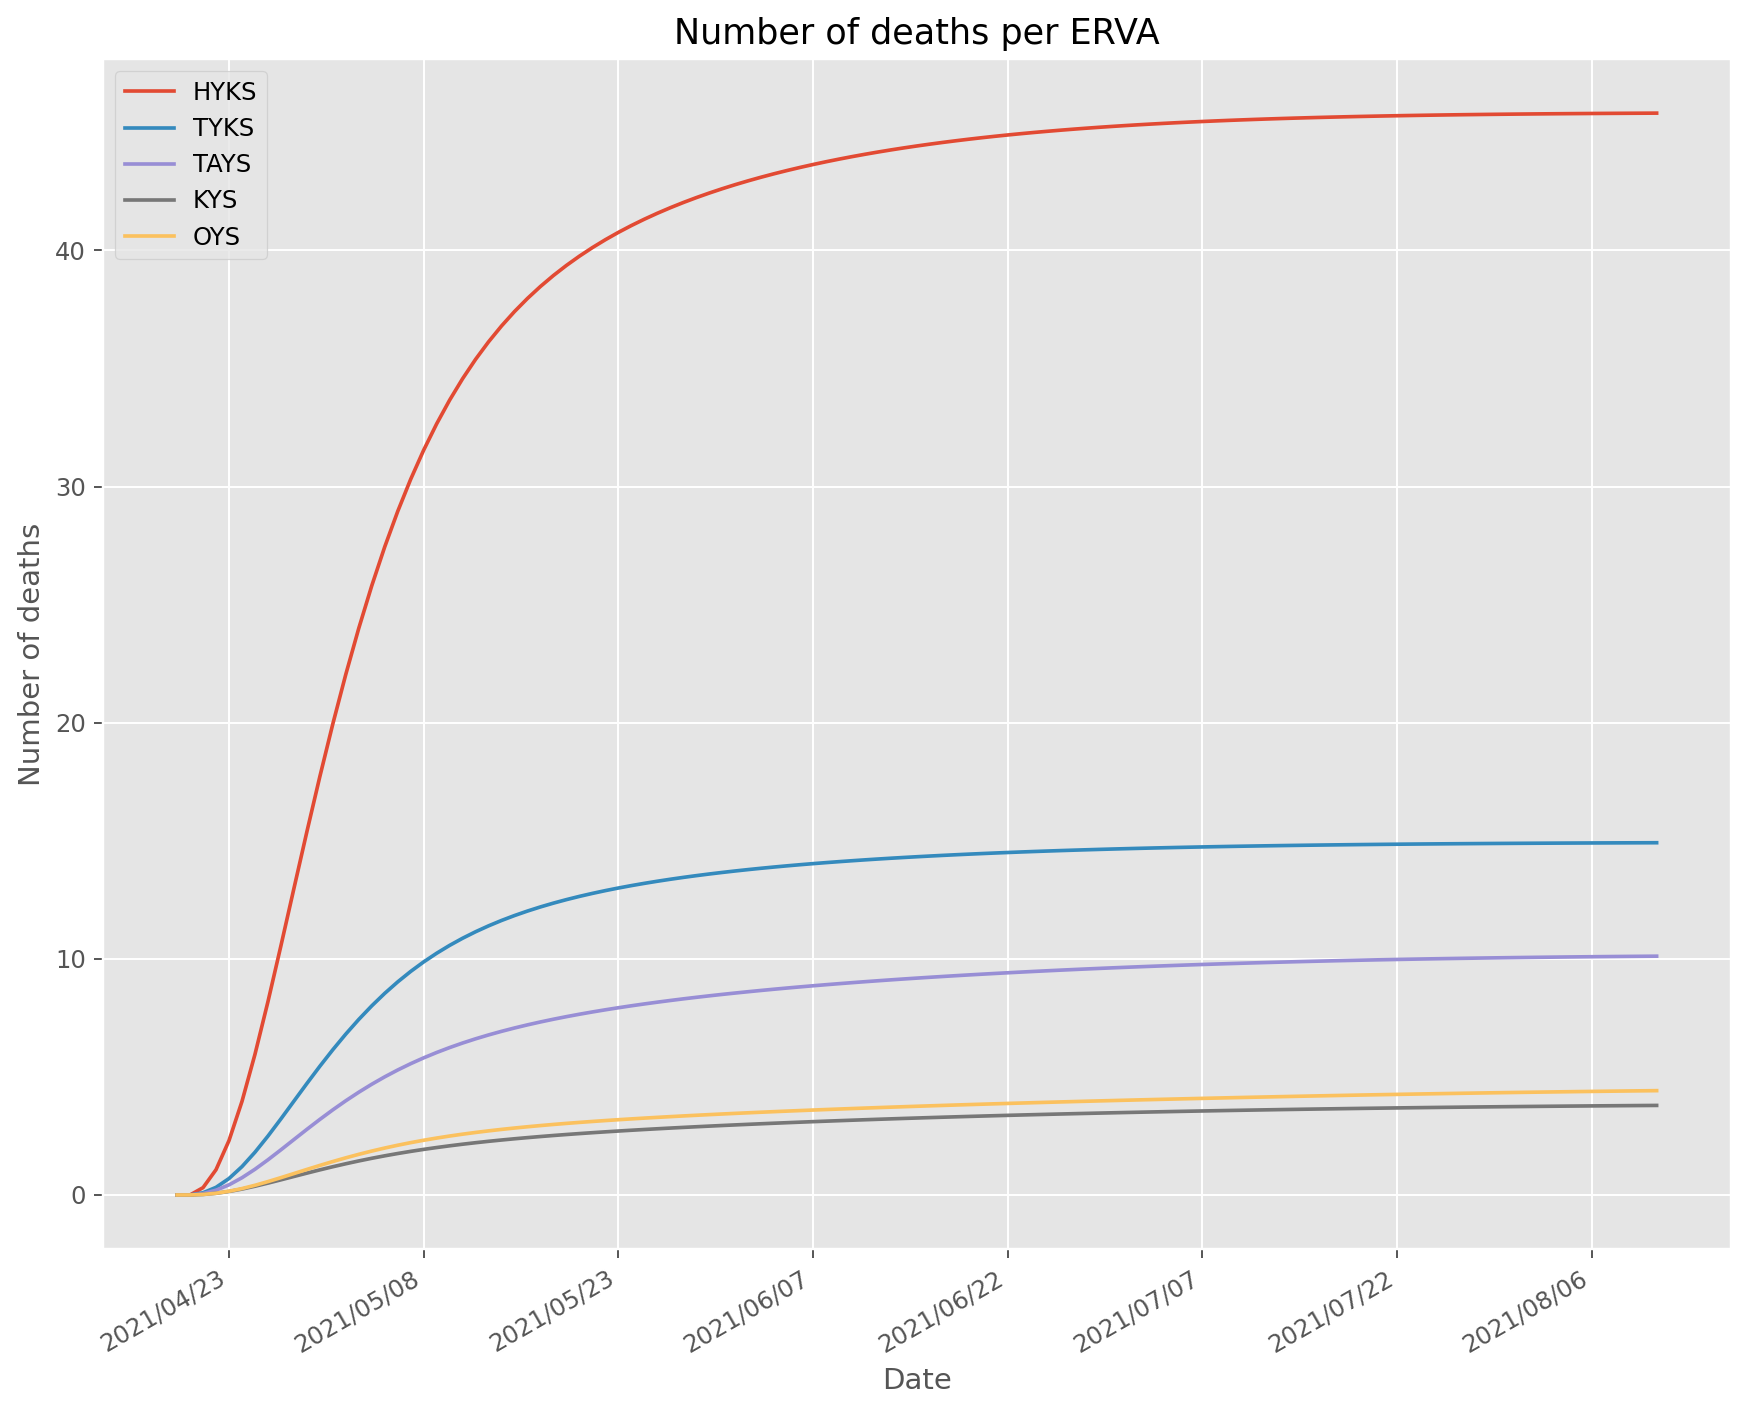

In [12]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_ervas(ax=ax, D_g=D_g_thl_plot, t0=t0, T=T, ervas_labels=ervas_labels, plot_subject='deaths')

fig.autofmt_xdate()

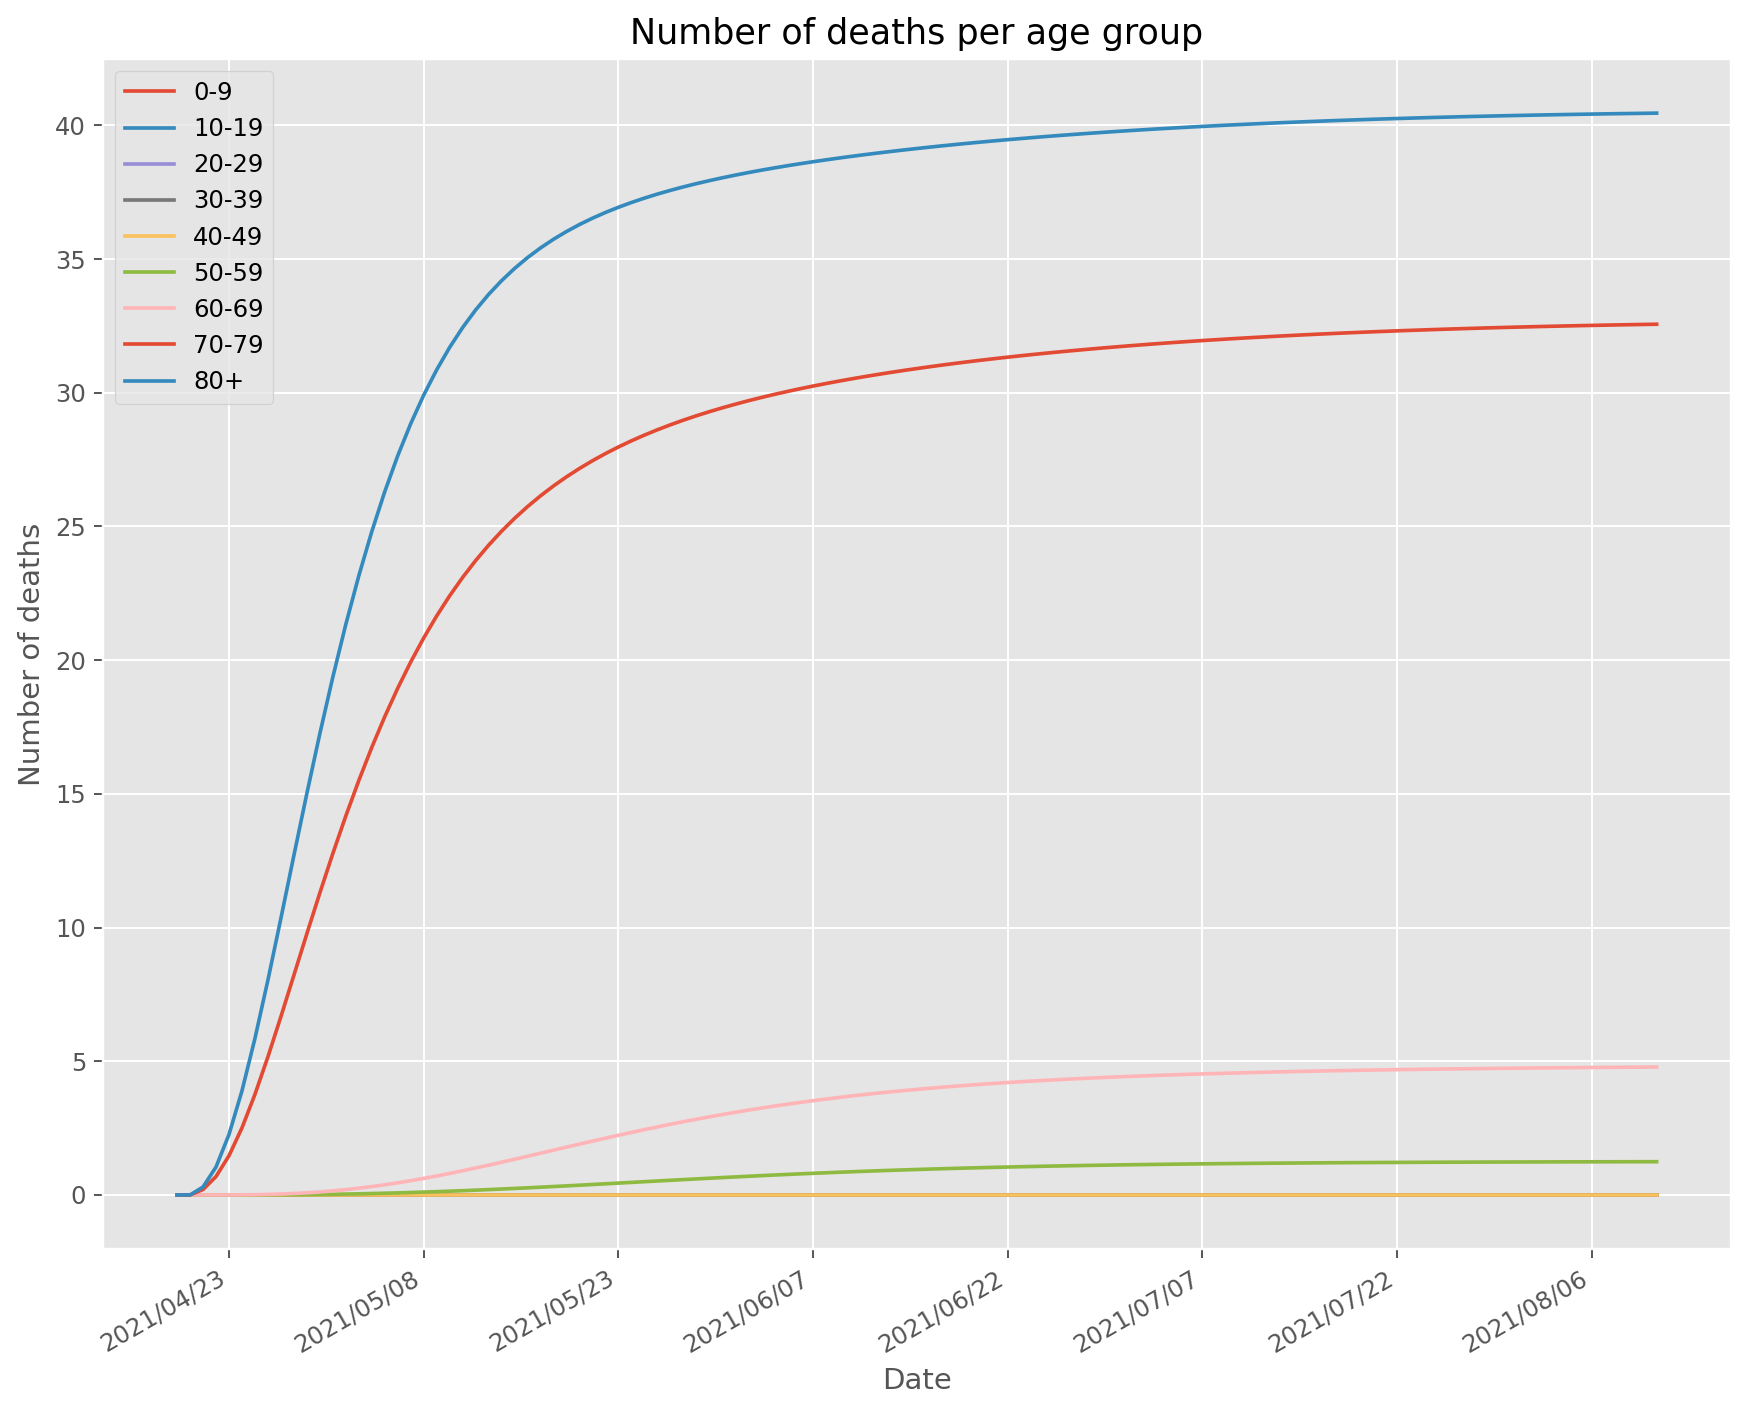

In [13]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_age_groups(ax=ax, D_g=D_g_thl_plot, t0=t0, T=T, age_labels=age_labels, plot_subject='deaths')

fig.autofmt_xdate()

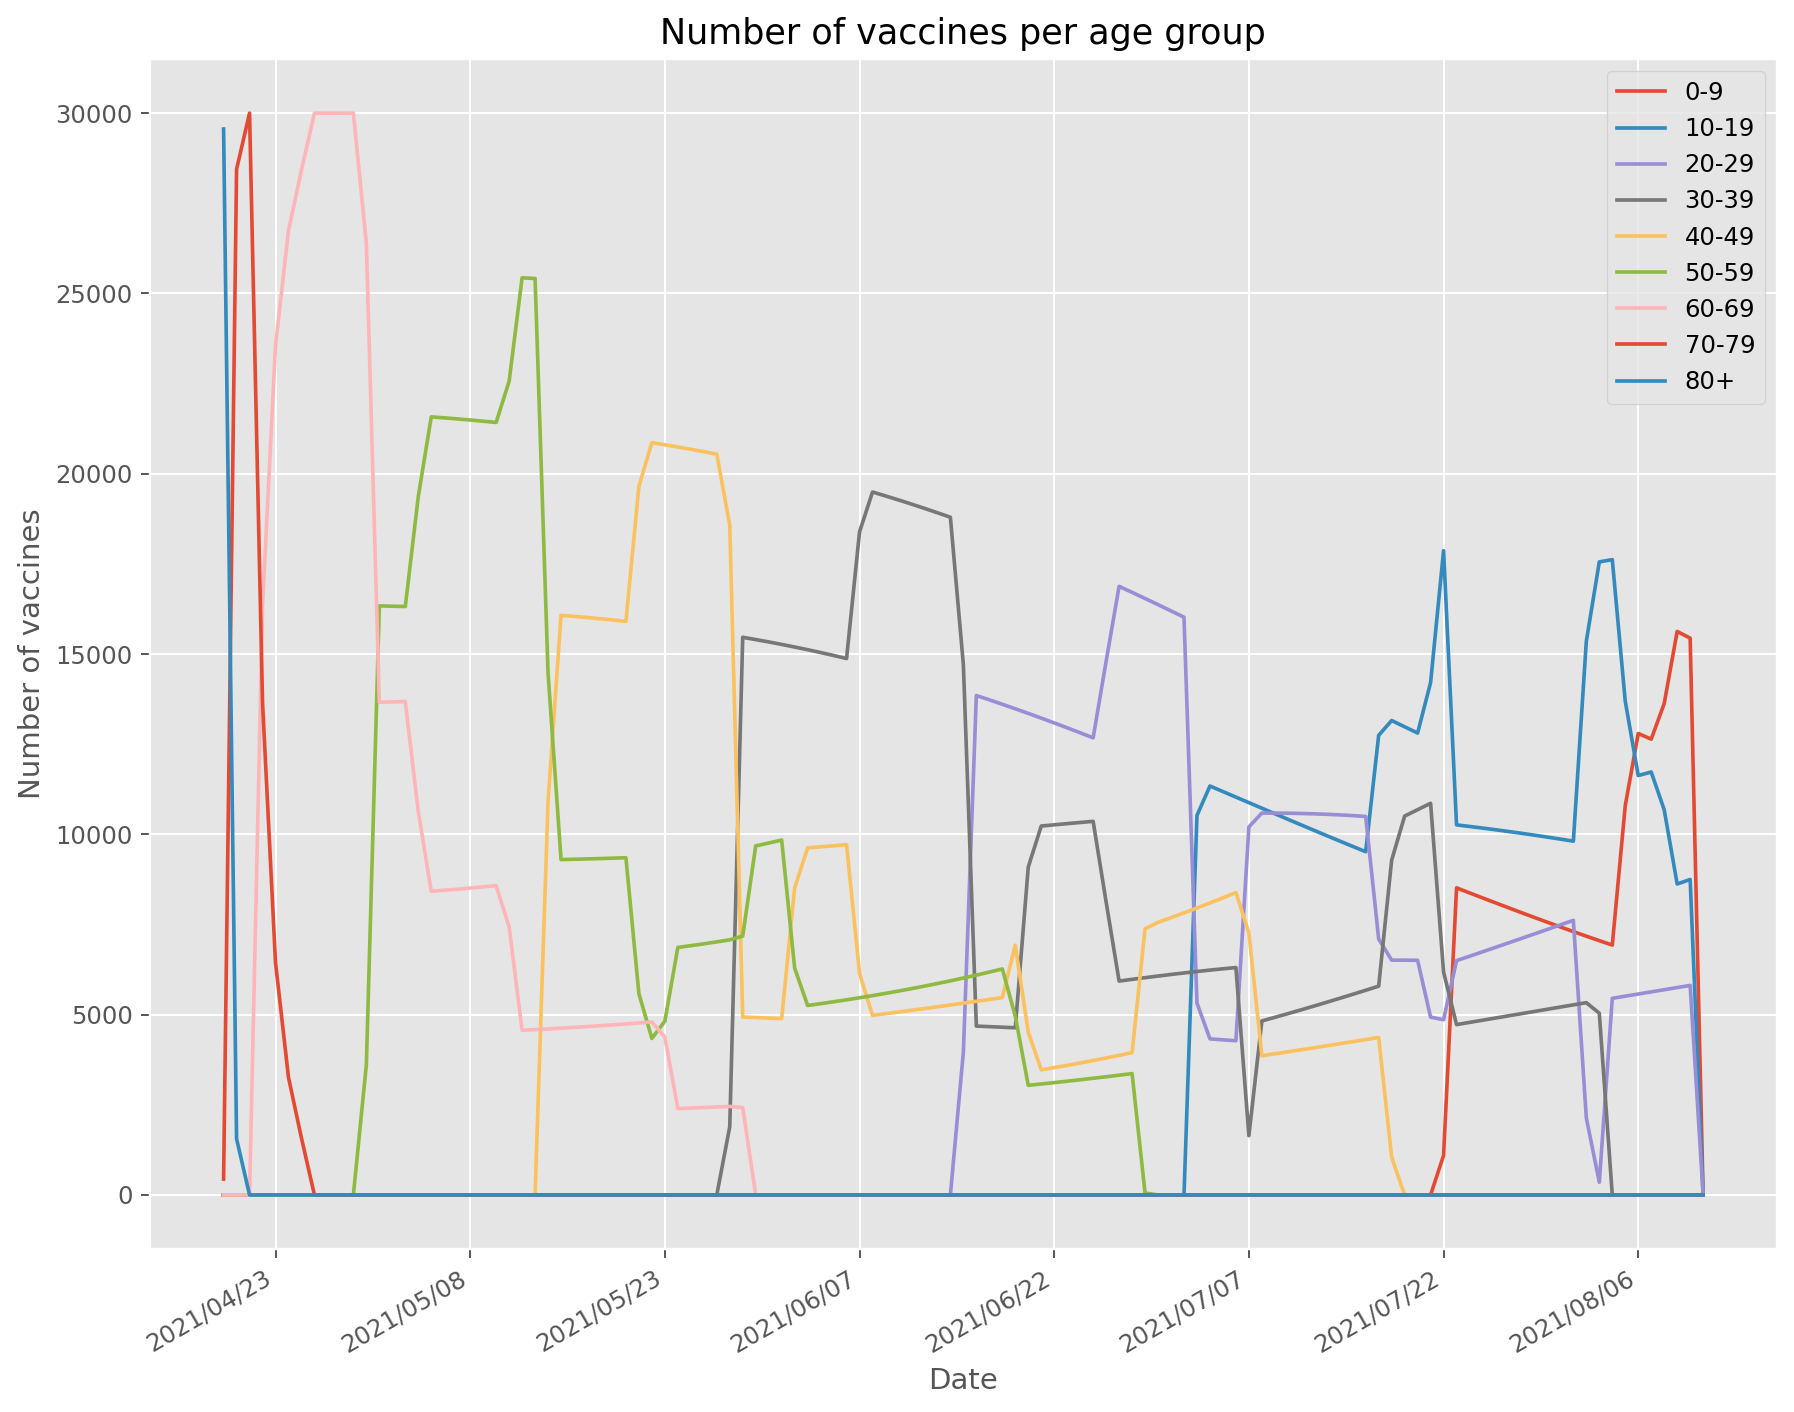

In [14]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_age_groups(ax=ax, D_g=u_g_thl_plot, t0=t0, T=T, age_labels=age_labels, plot_subject='vaccines')

fig.autofmt_xdate()

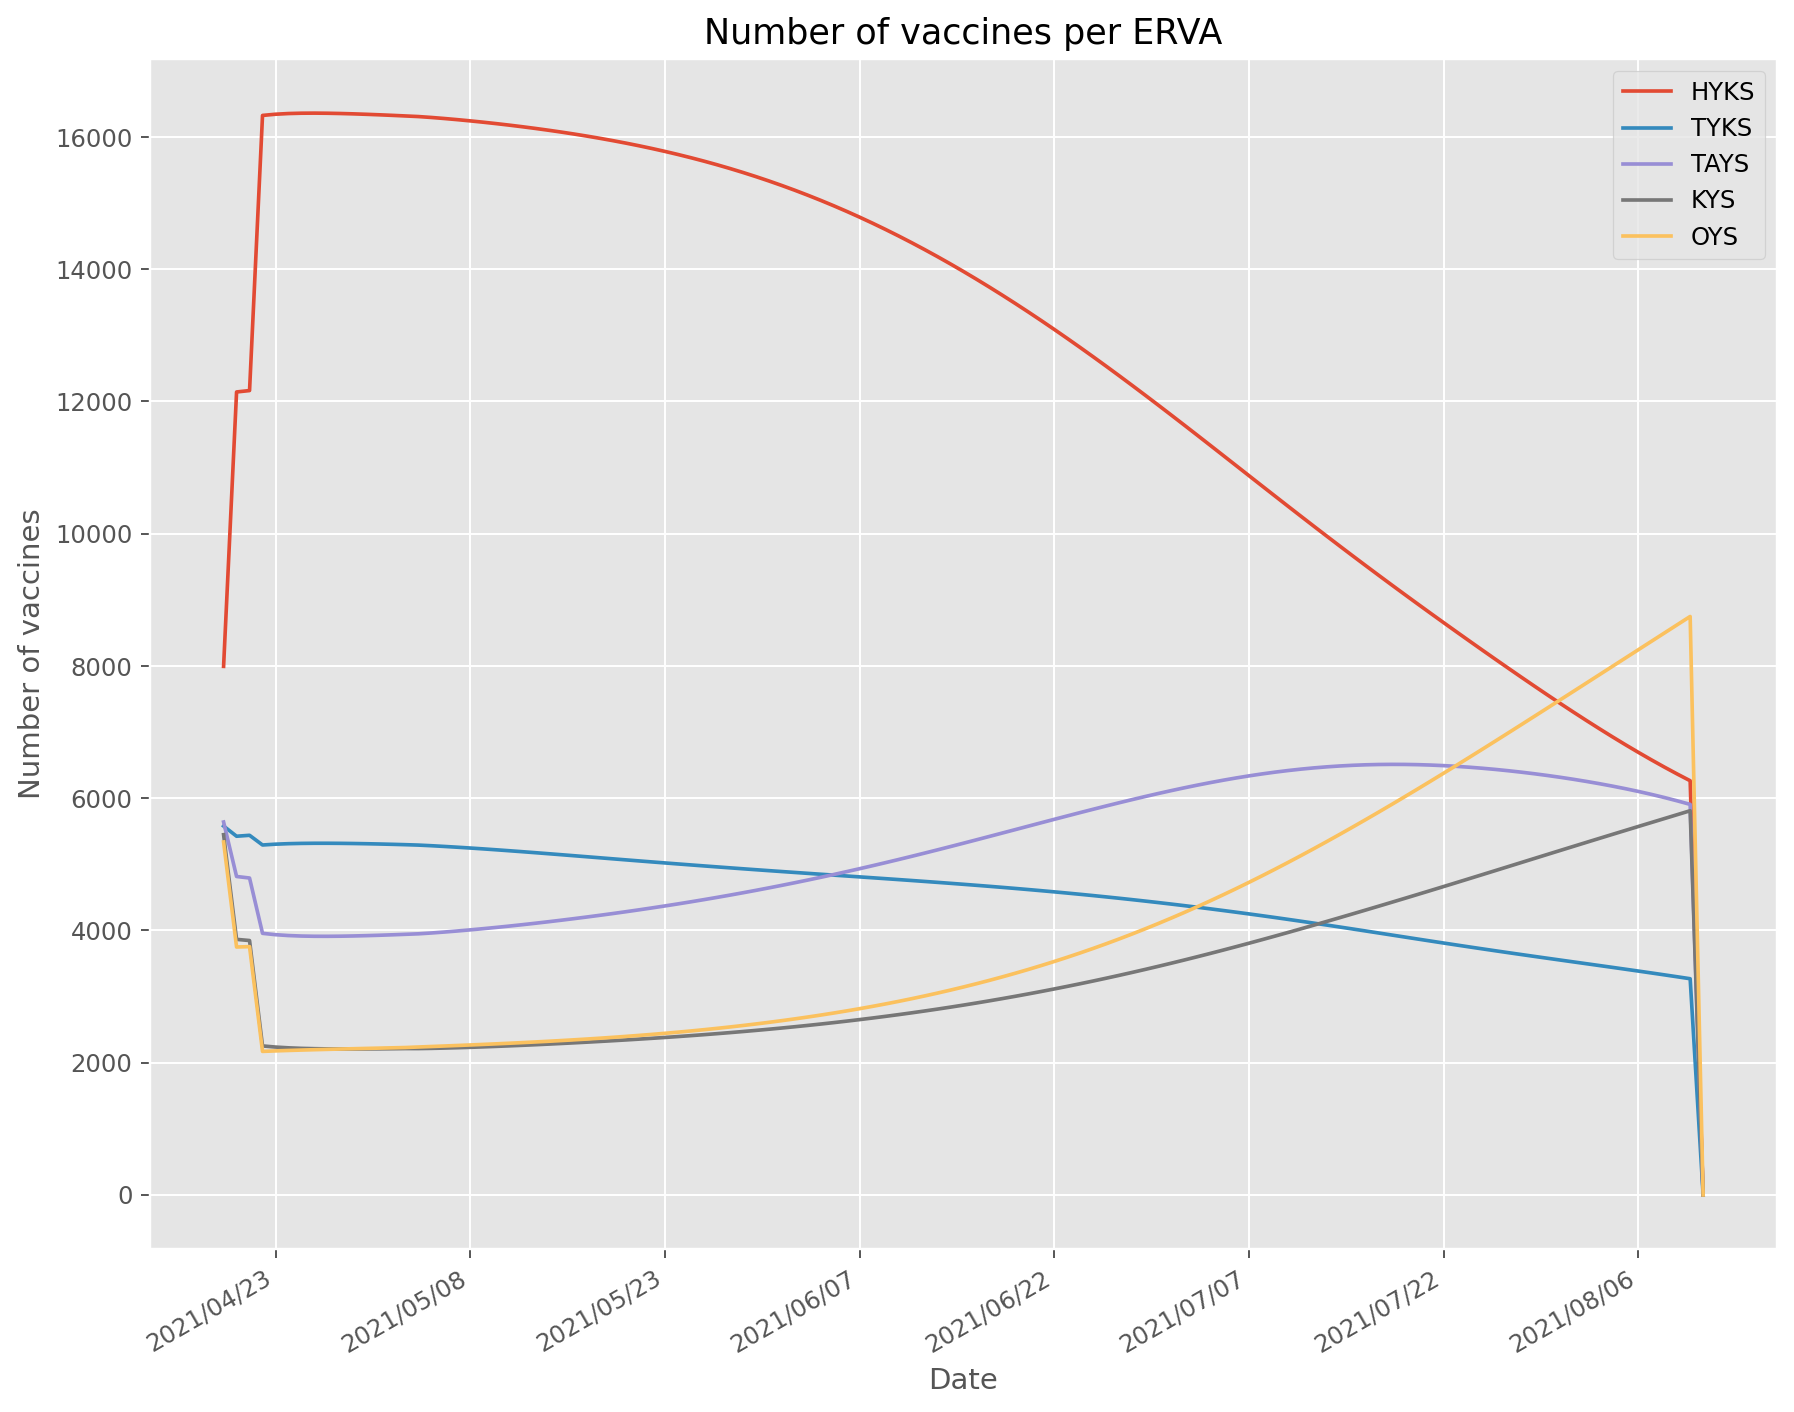

In [15]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_ervas(ax=ax, D_g=u_g_thl_plot, t0=t0, T=T, ervas_labels=ervas_labels, plot_subject='vaccines')

fig.autofmt_xdate()

In [16]:
policy = 'no_vacc'

_, _, _, _, _, D_g_no, u_g_no = forward_integration(u, mob_av, beta, beta_gh, T, pop_erva_hat, age_er, t0, policy)

age_er_prop = age_er.T
age_er_prop = age_er_prop[:, :, np.newaxis]
D_g_no_plot = D_g_no*age_er_prop
u_g_no_plot = u_g_no*age_er_prop

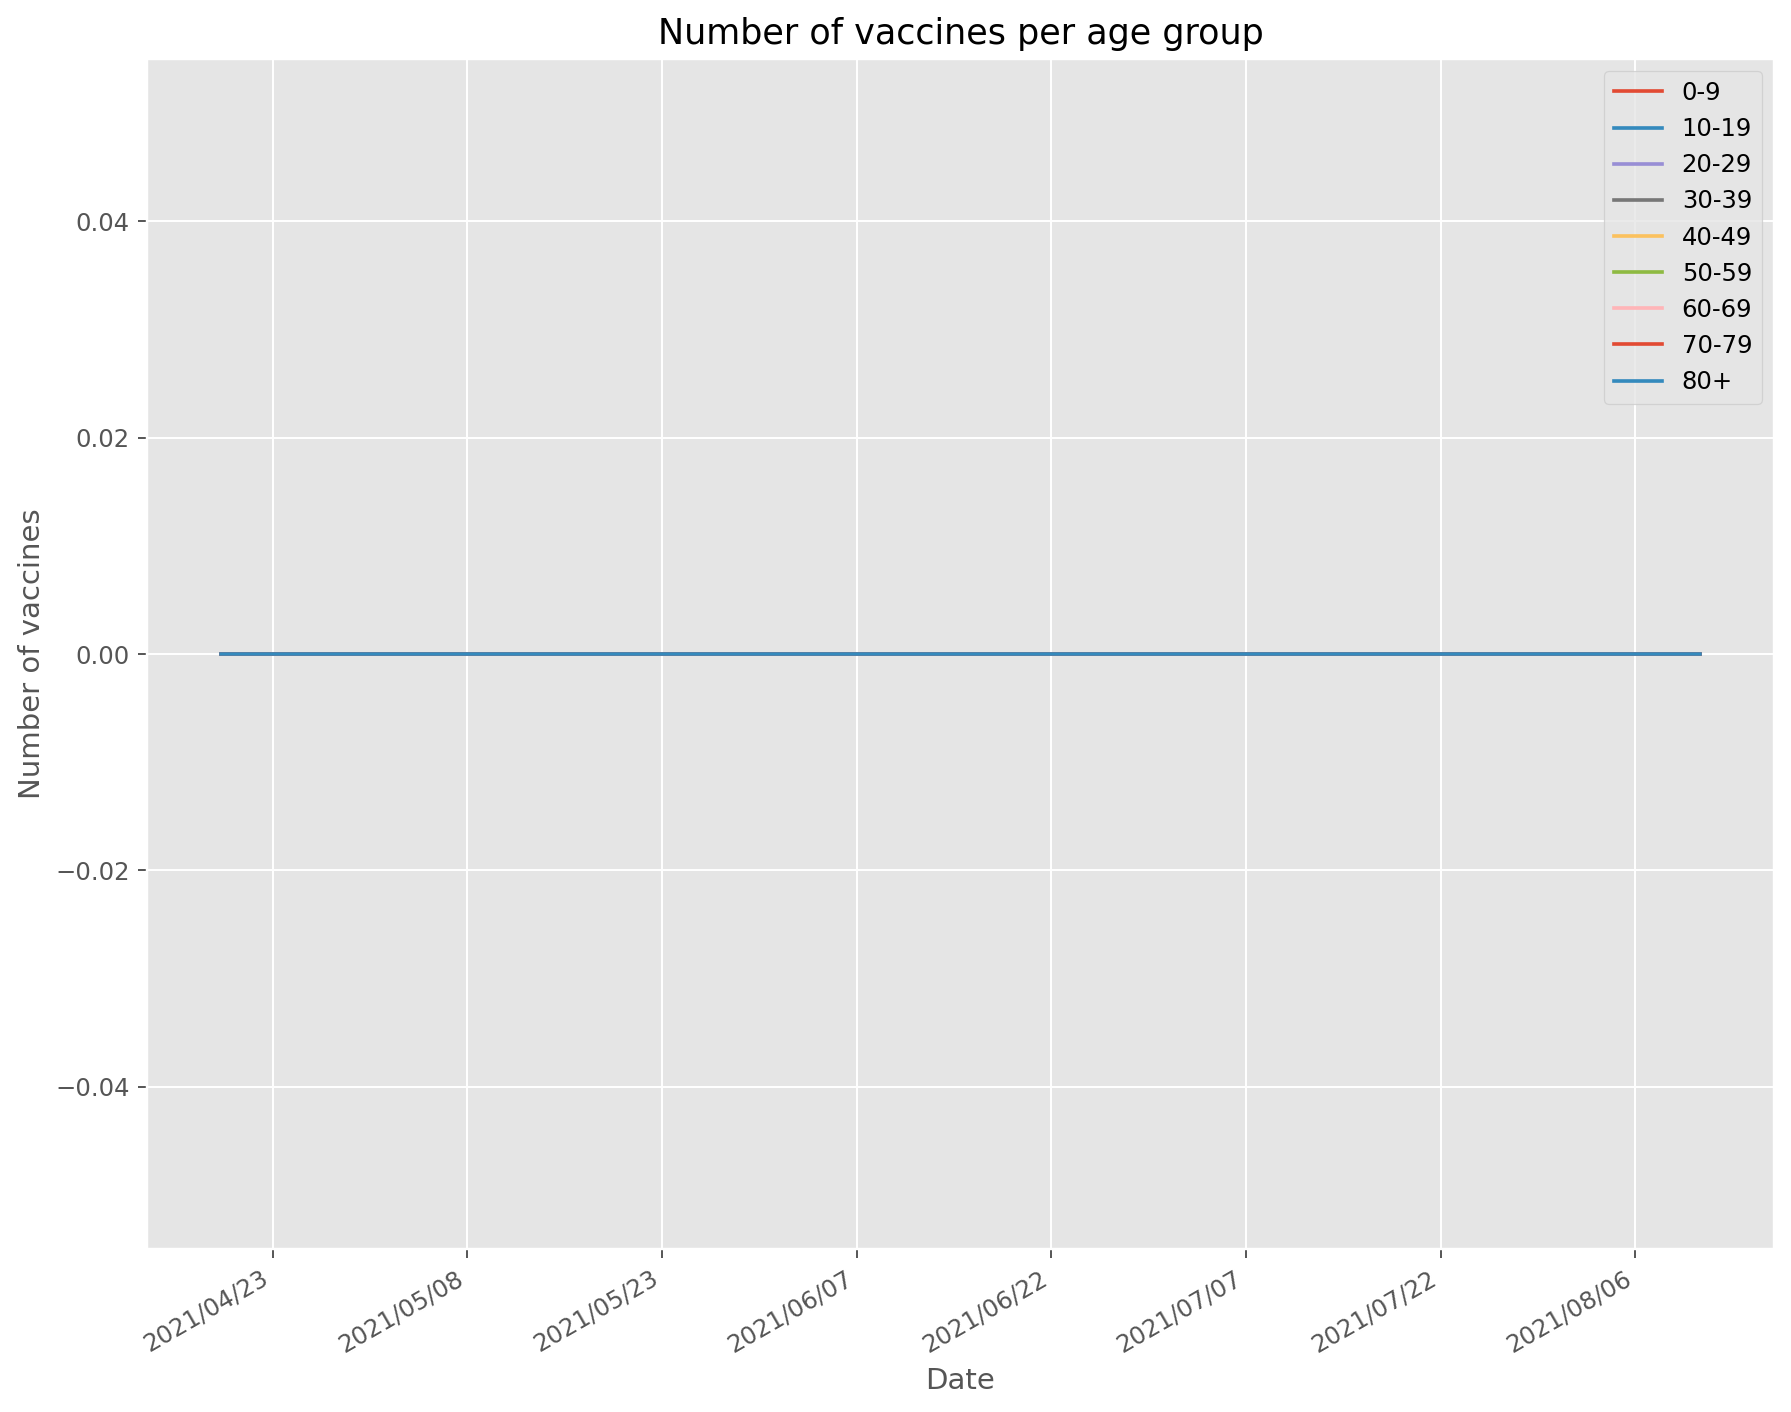

In [17]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_age_groups(ax=ax, D_g=u_g_no_plot, t0=t0, T=T, age_labels=age_labels, plot_subject='vaccines')

fig.autofmt_xdate()

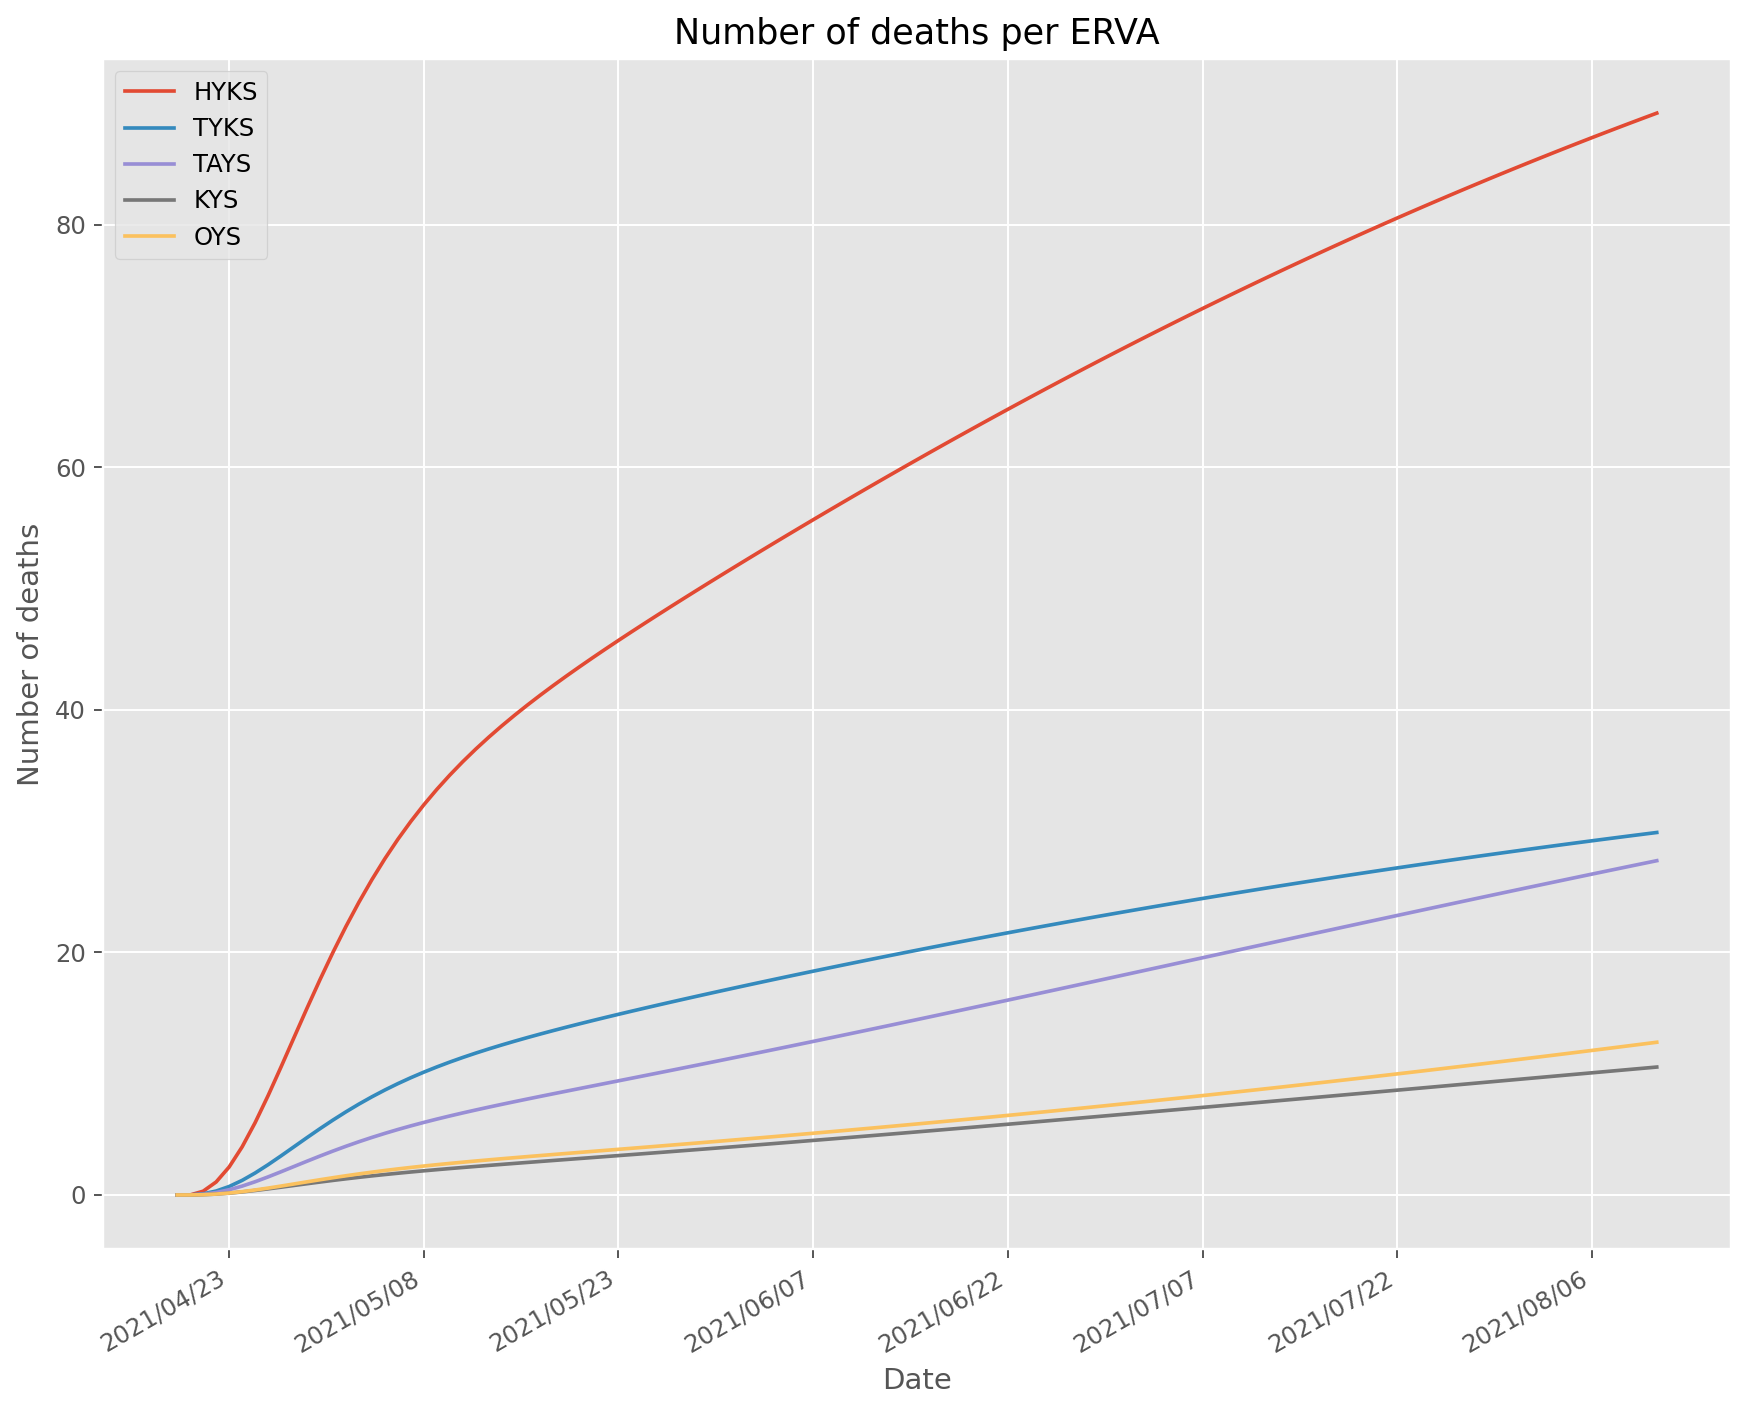

In [18]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_ervas(ax=ax, D_g=D_g_no_plot, t0=t0, T=T, ervas_labels=ervas_labels, plot_subject='deaths')

fig.autofmt_xdate()

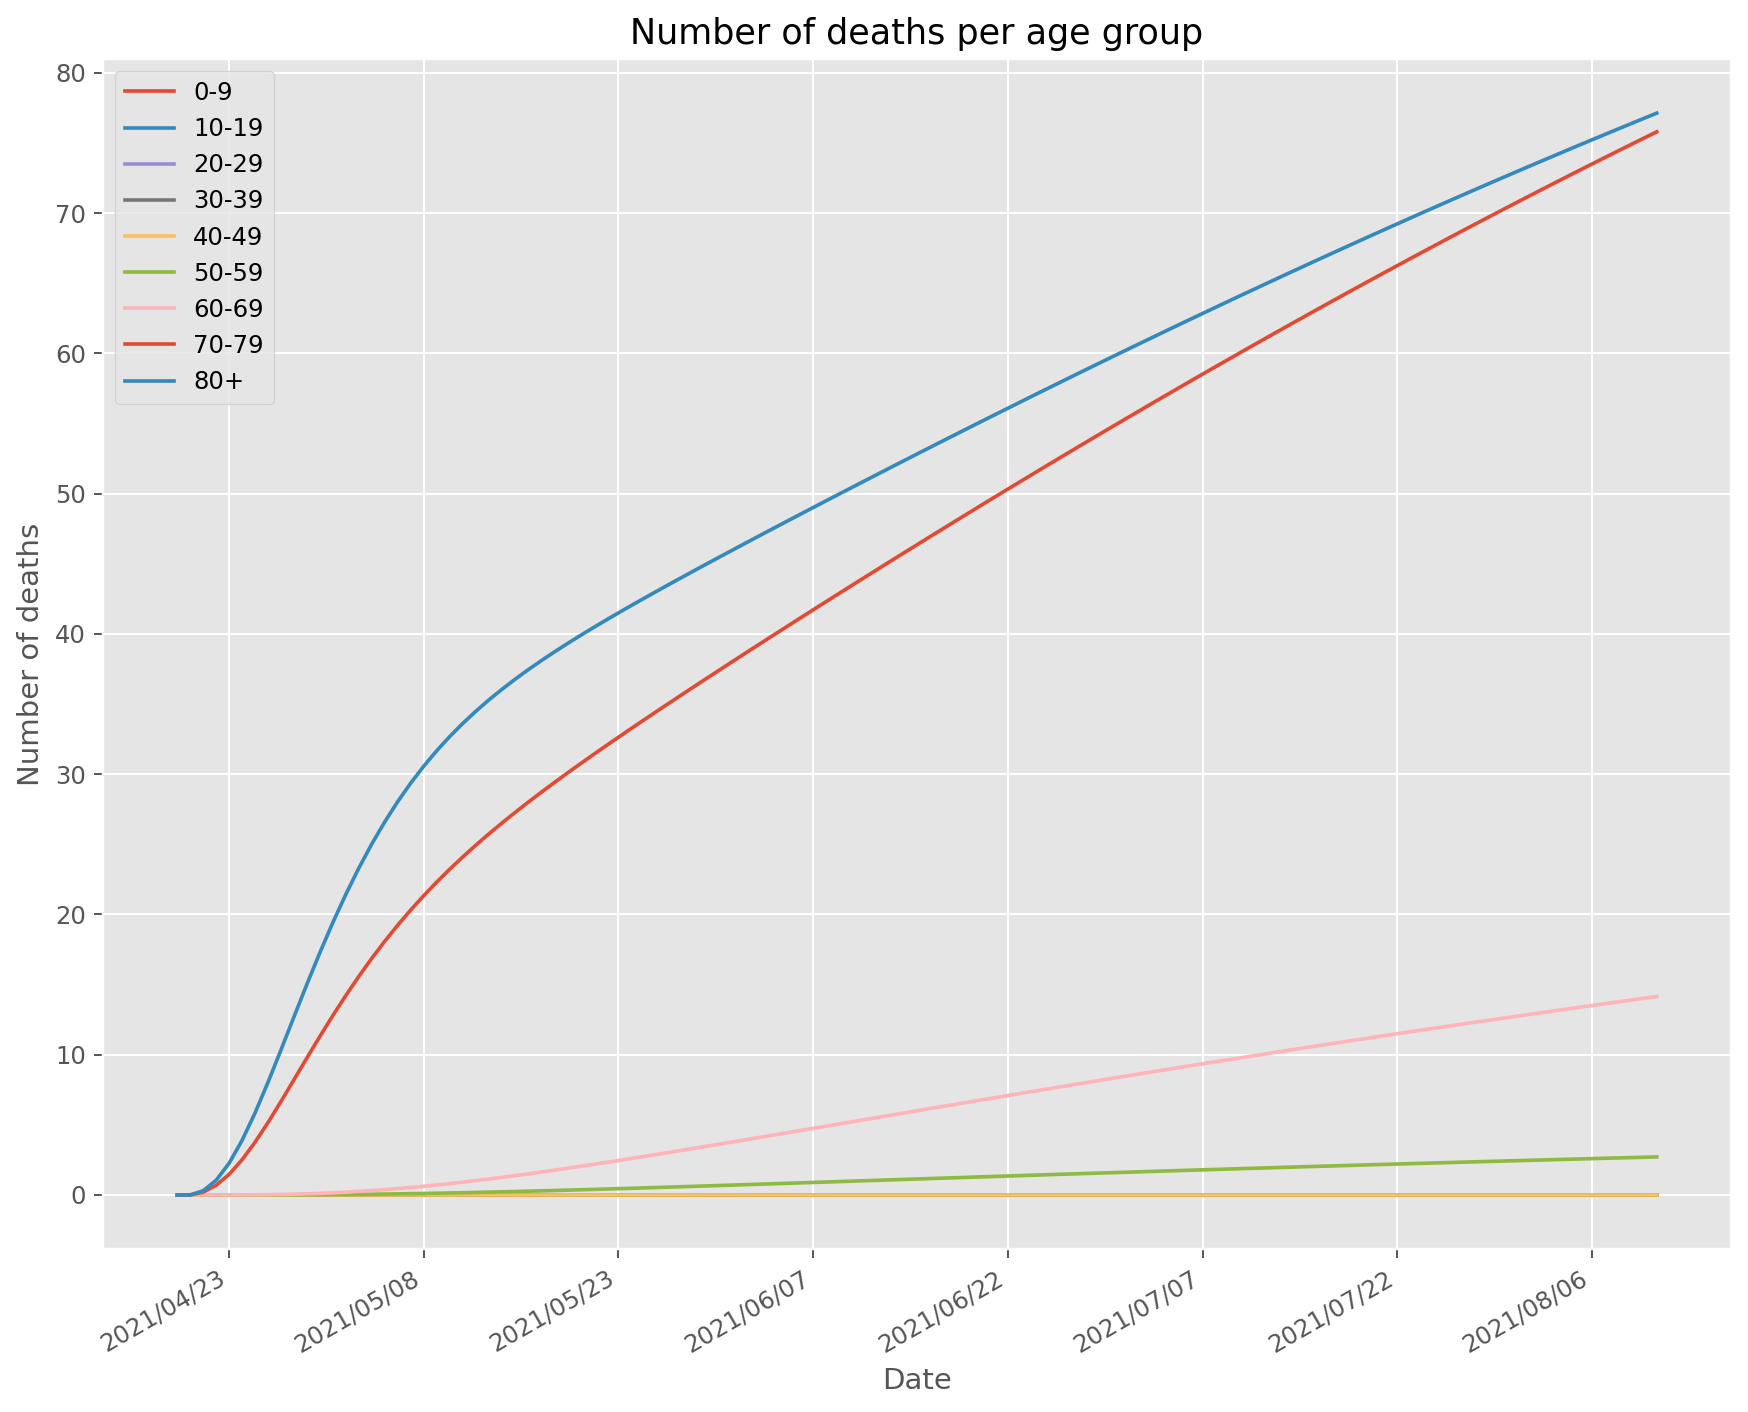

In [19]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_age_groups(ax=ax, D_g=D_g_no_plot, t0=t0, T=T, age_labels=age_labels, plot_subject='deaths')

fig.autofmt_xdate()

In [20]:
def plot_compare_strategies(ax, D_g, D_g_thl, D_g_no_plot, t0, T):
    begin = datetime.datetime.strptime(t0, '%Y-%m-%d')
    
    num_ages, num_ervas, days = D_g.shape
    assert num_ages == len(age_labels)
    
    x = [begin + datetime.timedelta(days=day) for day in range(T)]
    
    deaths = D_g.sum(axis=1)
    deaths = deaths.sum(axis=0)
    
    deaths_thl = D_g_thl.sum(axis=1)
    deaths_thl = deaths_thl.sum(axis=0)
    
    deaths_no = D_g_no_plot.sum(axis=1)
    deaths_no = deaths_no.sum(axis=0)
    
    assert deaths.shape == deaths_thl.shape
    assert deaths.shape == deaths_no.shape
    assert deaths.shape[0] == T
    
    ax.plot(x, deaths, label='Number of vaccines proportional to population')
    ax.plot(x, deaths_thl, label='THL strategy. Weighted sum')
    ax.plot(x, deaths_no, label='No vaccination.')
    
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of deaths')
    ax.set_title('Comparing vaccination strategies')
        
    ax.legend()
    
    return ax

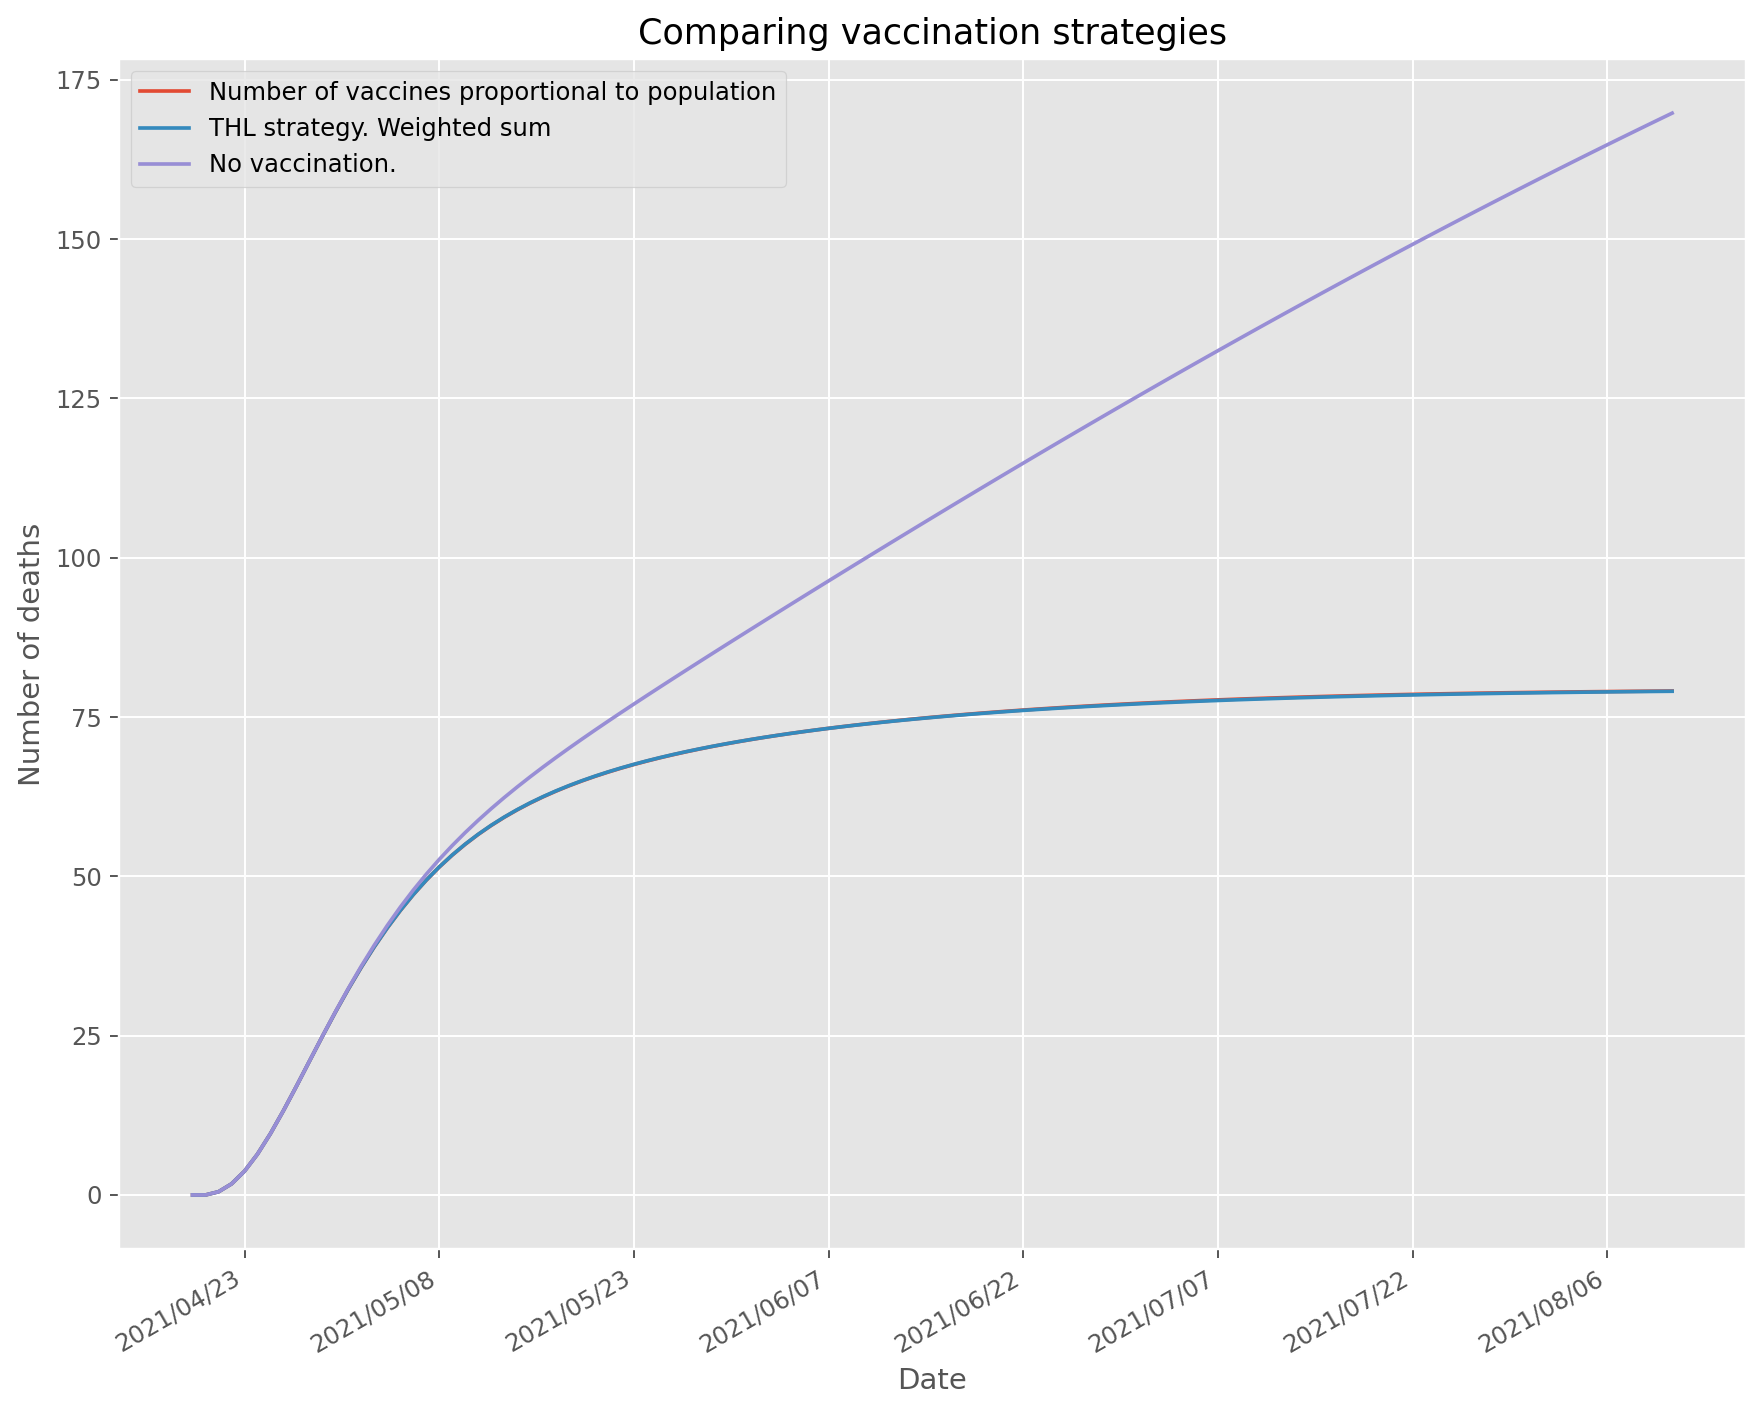

In [21]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_compare_strategies(ax=ax, D_g=D_g_plot, D_g_thl=D_g_thl_plot, D_g_no_plot=D_g_no_plot, t0=t0, T=T)

fig.autofmt_xdate()

In [22]:
total_thl = np.sum(D_g_thl_plot[:, :, -1])
total_equal = np.sum(D_g_plot[:, :, -1])
total_no = np.sum(D_g_no_plot[:, :, -1])
print('Final total deaths per strategy\n'
      'Relative to population: %f\n'
      'THL strategy: %f\n'
      'No vaccination: %f\n' % (total_equal, total_thl, total_no))

Final total deaths per strategy
Relative to population: 79.091321
THL strategy: 79.049876
No vaccination: 169.784461



In [23]:
def get_infections_r_eff(rho, T, t0, mob_av, beta_gh, pop_erva_hat, age_er, *rs):
    age_er_prop = age_er.T
    age_er_prop = age_er_prop[:, :, np.newaxis]
    r_infs = []
    u = 0
    policy = 'no_vacc'
    total_rs = len(rs)
    for i, r in enumerate(rs):
        beta = r/rho
        _, _, _, _, i_r, _, _ = forward_integration(u, mob_av, beta, beta_gh, T, pop_erva_hat, age_er, t0, policy)
        
        i_r_plot = i_r*age_er_prop
        result_r = ('R=%s' % (r, ), i_r_plot)
        r_infs.append(result_r)
        print('Finished %s/%s. R: %f. Beta: %f' % (i+1, total_rs, r, beta), end='\r')
        
    return r_infs

In [24]:
T = 400
r_infs = get_infections_r_eff(rho, T, t0, mob_av, beta_gh, pop_erva_hat, age_er,  0.9, 1.1, 1.3, 1.270707)

In [25]:
def compare_rs_curves(ax, t0, T, *r_infs):
    begin = datetime.datetime.strptime(t0, '%Y-%m-%d')
    x = [begin + datetime.timedelta(days=day) for day in range(T)]
    
    r_infs = r_infs[0]
    for label, infs in r_infs:
        inf_plot = infs.sum(axis=1)
        inf_plot = inf_plot.sum(axis=0)
        
        assert inf_plot.shape[0] == T
        
        ax.plot(x, inf_plot, label=label)
        
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of infections')
    ax.set_title('Comparing Rs')
    ax.legend()
    
    return ax

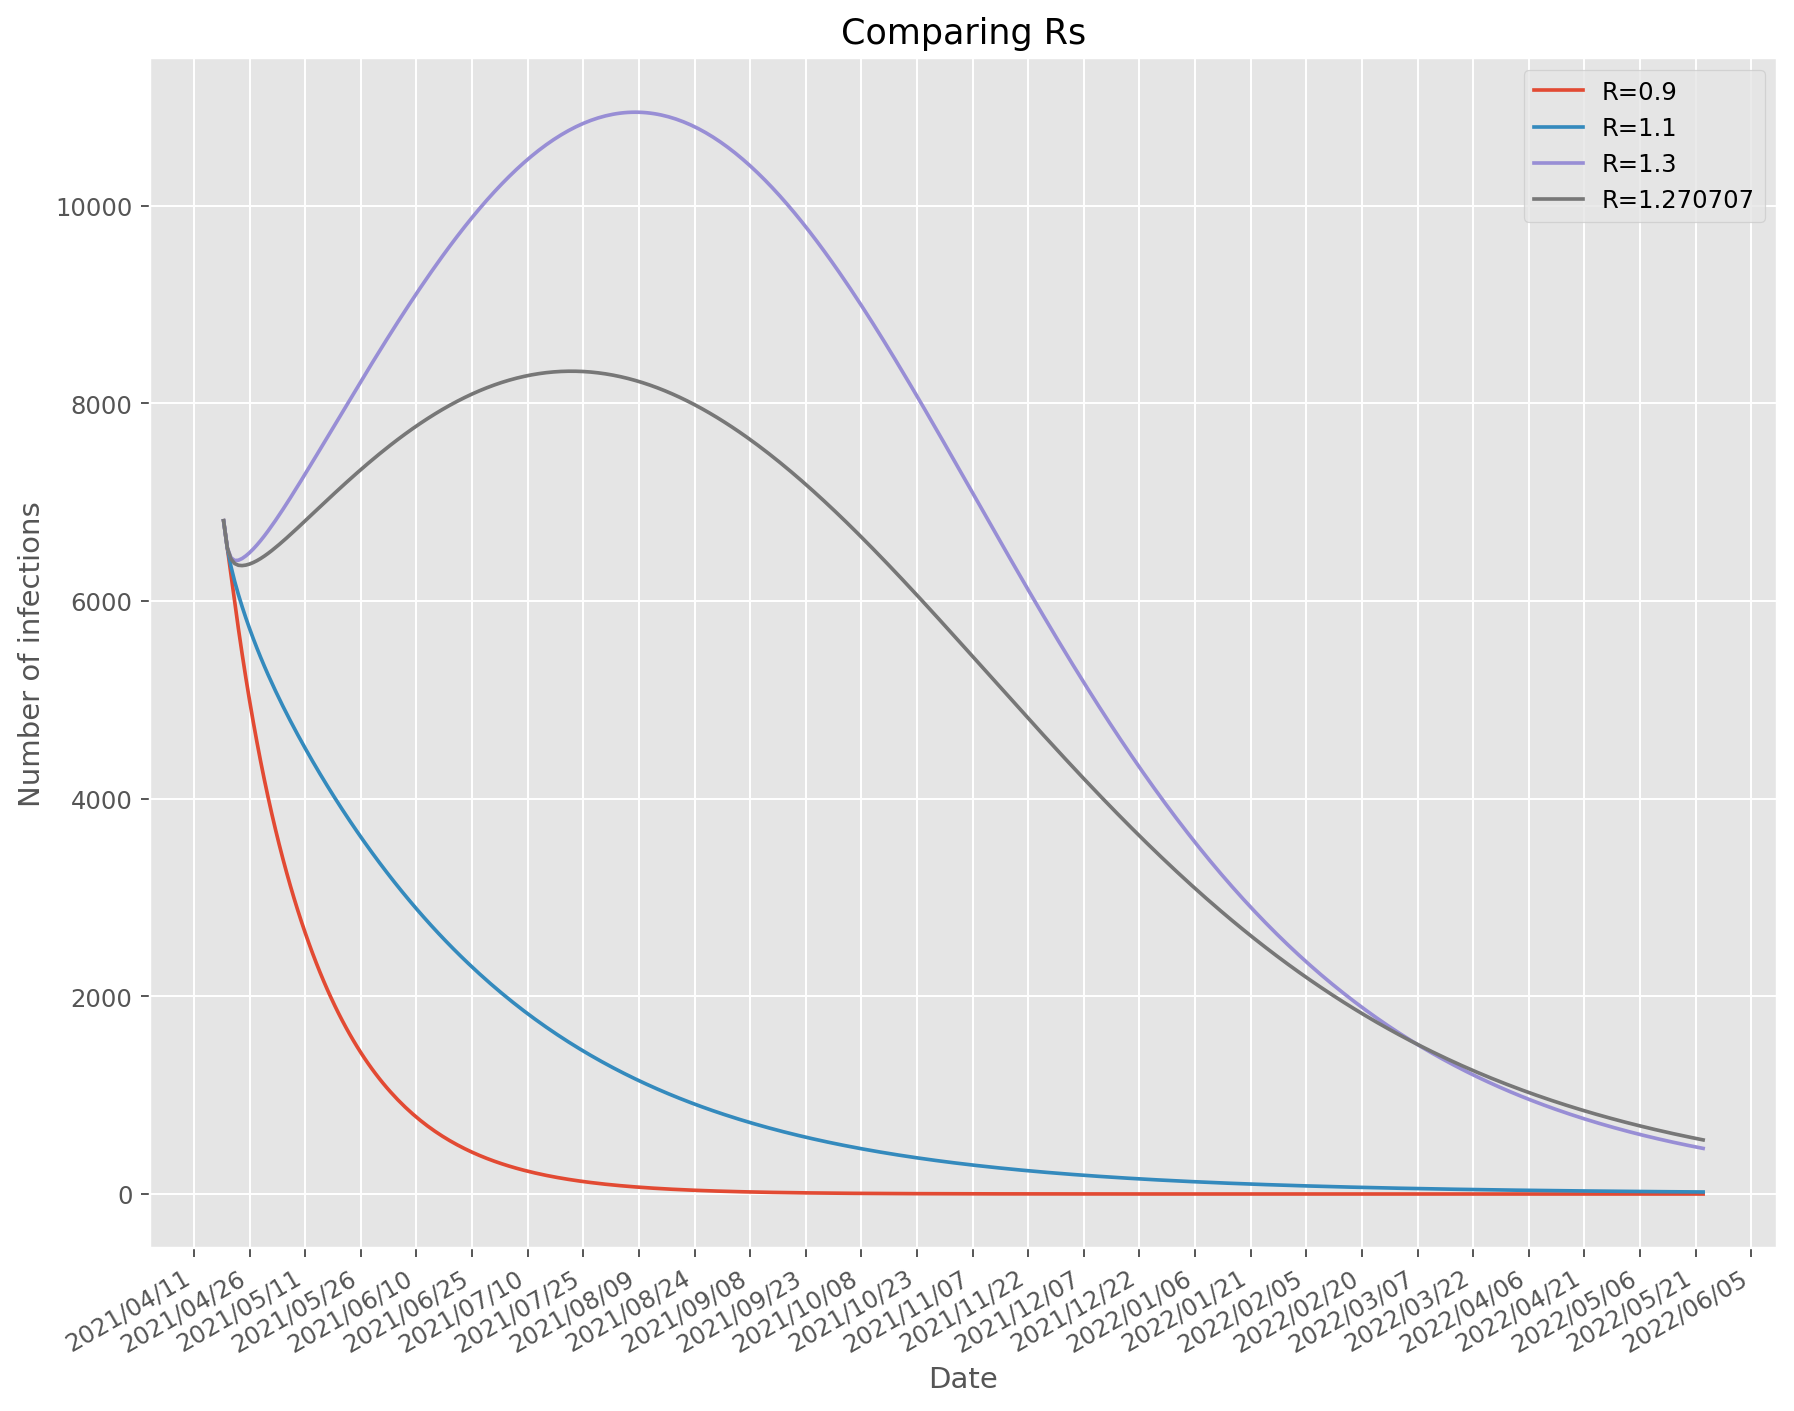

In [26]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = compare_rs_curves(ax, t0, T, r_infs)

fig.autofmt_xdate()

In [27]:
# T = 400
# policy = 'no_vacc'
# rs = np.linspace(1.2, 1.3, 100)
# total_rs = len(rs)
# rho = 48.920154

# best_r = None
# best_beta = None
# best_d = np.inf
# for i, r in enumerate(rs):
#     beta = r/rho
#     _, _, _, _, I_try, _, _ = forward_integration(u, mob_av, beta, beta_gh, T, pop_erva_hat, age_er, t0, policy)

#     age_er_prop = age_er.T
#     age_er_prop = age_er_prop[:, :, np.newaxis]
#     i_real = I_try*age_er_prop
#     i_real_tot = i_real.sum(axis=1)
#     i_real_tot = i_real_tot.sum(axis=0)
    
#     first_i = i_real_tot[0]
    
#     distance = np.sqrt(np.sum((first_i - i_real_tot)**2))
#     if distance < best_d:
#         best_d = distance
#         best_beta = beta
#         best_r = r
    
#     print('Finished %s/%s. Best R: %f. Best beta: %f. Best distance: %f. Distance: %f' % (i+1, total_rs, best_r, best_beta, best_d, distance), end='\r')